In [1]:
#Implementing n-grams in Python

# Analyzing different types of n-grams on the given text data and hence decide which n-gram works the 
# best for our data.

# 1.What are n-grams?
# 2.How are n-grams classified?
# 3.An example of n-grams
# 4.Step-by-step implementation of n-grams in Python
# 5.Results
# 6.Conclusion

In [2]:
# 1.What are n-grams?
# N-grams are continuous sequences of words or symbols or tokens in a document.In technical terms,they 
# can be defined as the neighbouring sequences of items in a document.They come into play when we deal 
# with text data in NLP(Natural Language Processing) tasks.

# 2.How are n-grams classified?
# ’n’ is just a variable that can have positive integer values including 1,2,3 and so on.’n’ basically 
# refers to multiple.
# n-grams are classified into the following types, depending on the value that ‘n’ takes.
# n ======> Term
# 1 ======> Unigram
# 2 ======> Bigram
# 3 ======> Trigram
# n ======> n-gram

# 3.An example of n-grams
# Let’s understand n-grams practically with the help of the following sentence:
# “I reside in Bengaluru”
# SL.No ========> Type of n-gram  ========> Generated n-grams
# 1     ========> Unigram         ========> [“I”,”reside”,”in”,“Bengaluru”]
# 2     ========> Bigram          ========> [“I reside”,”reside in”,”in Bengaluru”]
# 3     ========> Trigram         ========> [“I reside in”, “reside in Bengaluru”]

# Step-by-step implementation of n-grams in Python.
# Steps:
# 1.Explore the dataset
# 2.Feature extraction
# 3.Train-test split
# 4.Basic pre-processing
# 5.Code to generate N-grams
# 6.Creating unigrams
# 7.Creating bigrams
# 8.Creating trigrams

In [3]:
# Let’s begin, as usual,by importing the required libraries and reading and understanding the data:

# 1. Explore the dataset:
# SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR HAVING 3 CATEGORIES:
# 1.positive # 2.negative # 3.neutral
# DATASET: https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-neWS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
plt.style.use(style='seaborn')
%matplotlib inline

In [4]:
df=pd.read_csv('E:/datafiles/data_raw/all-data.csv',encoding = "ISO-8859-1")
df.head()

# NOTE: When you download the dataset from Kaggle directly,you will notice that the columns are nameless!
# So, I have named them later and updated them in the all-data.csv file before reading it using pandas. 
# Ensure that you do not miss this step.

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
df.info()
# You can see that the dataset has 4846 rows and two columns, namely,’ Sentiment’ and ‘News Headline’.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
df.isna().sum()

# The data is just perfect with absolutely no missing values at all! That’s our luck indeed!

Sentiment        0
News Headline    0
dtype: int64

In [7]:
df["Sentiment"].value_counts()

# We can undoubtedly infer that the dataset includes three categories of sentiments:
# 1.Neutral   # 2.Positive  # 3.Negative
# Out of 4846 sentiments,2879 have been found to be neutral,1363 positive, and the rest negative.

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

In [8]:
# 2.Feature extraction:
# Our objective is to predict the sentiment of a given news headline. Obviously,the ‘News Headline’ 
# column is our only feature and the ‘Sentiment’ column is our target variable.

y = df['Sentiment'].values
y.shape

(4846,)

In [9]:
x=df['News Headline'].values
x.shape

# Note: Both the outputs return a shape of (4846,) which means 4846 rows and 1 column as we have 4846 rows
# of data and just 1 feature and a target for x and y respectively.

(4846,)

In [10]:
# 3. Train-test split: Now splitting the dataset into train_test_split for model building
#  60-40 ratio of split provides more useful and meaningful insights from the trigrams generated.

from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [11]:
x_train.shape

(2907,)

In [12]:
y_train.shape

(2907,)

In [13]:
x_test.shape

(1939,)

In [14]:
y_test.shape

(1939,)

In [15]:
# On executing the codes above,you will observe that 2907 rows have been considered as train data and the
# rest of 1939 rows have been considered as test data.

# Our next step is to convert these NumPy arrays to Pandas data frames and thus create two data frames,
# namely, 1.df_train and 2.df_test. The former is created by concatenating x_train and y_train arrays. 
# The latter data frame is created by concatenating x_test and y_test arrays. This is necessary to count 
# the number of positive, negative, and neutral sentiments in both train and test datasets which we will 
# be doing in a while.

In [16]:
# 1.Creating dataframe df_train by concatinating x_train + y_train 

# news-column
df1 = pd.DataFrame(x_train)
df1 = df1.rename(columns={0:'news'})

In [17]:
# sentiment-column
df2 = pd.DataFrame(y_train)
df2 = df2.rename(columns={0:'sentiment'})

In [18]:
# 1.Creating dataframe df_train by concatinating x_train[news] + y_train[sentiment]

df_train = pd.concat([df1,df2],axis=1)
df_train.head()

,news,sentiment
0,"After the acquisition , Basware 's preliminary...",neutral
1,"The Group , with net sales of EUR 235 million ...",neutral
2,Finnish telecoms software developer Tecnomen O...,positive
3,"CHS Expo Freight is a major Finnish fair , exh...",neutral
4,"The launch of the plant in June went well , an...",positive


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [20]:
# 1.Creating dataframe df_test by concatinating x_test + y_test

# news-column
df3 = pd.DataFrame(x_test)
df3 = df3.rename(columns={0:'news'})

In [21]:
# sentiment-column
df4 = pd.DataFrame(y_test)
df4 = df2.rename(columns={0:'sentiment'})

In [22]:
# 2.Creating dataframe df_test by concatinating x_test[news] + y_test[sentiment]

df_test = pd.concat([df3,df4],axis=1)
df_test.head()

,news,sentiment
0,It estimates the operating profit to further i...,neutral
1,Rubin says he expects Capman to announce 1-2 a...,neutral
2,Unilever 's Turun Sinappi that is made in Swed...,positive
3,Orders received grew by 55 % year-on-year to E...,neutral
4,The new majority owners of Aspocomp Thailand C...,positive


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 68.1+ KB


In [24]:
# 4. Basic pre-processing of train and test data
# Here, in order to pre-process our text data, we will remove punctuations in train and test data for the 
# ‘news’ column using punctuation provided by the string library.

#removing punctuations
#library that contains punctuation

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
#defining the function to remove punctuation

def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [26]:
#storing the puntuation free text in a new column called clean_msg

df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [27]:
df_train.head()

#punctuations are removed from news column in train dataset.

# Compare the above output with the previous output of df_train. You can observe that punctuations have 
# been successfully removed from the text present in the feature column(news column) of the training 
# dataset.Similarly, from the above codes,punctuations will be removed successfully from the news column 
# of the test data frame as well.You can optionally view df_test.head() as well to note it.

,news,sentiment
0,After the acquisition Basware s preliminary p...,neutral
1,The Group with net sales of EUR 235 million i...,neutral
2,Finnish telecoms software developer Tecnomen O...,positive
3,CHS Expo Freight is a major Finnish fair exhi...,neutral
4,The launch of the plant in June went well and...,positive


In [28]:
# As a next step,we have to remove stopwords from the news column. For this,let’s use the stopwords 
# provided by nltk as follows:

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# We will be using this to generate n-grams in the very next step.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
# 5. Code to generate n-grams
# Lets code a custom function to generate n-grams for a given text as follows:
#method to generate n-grams:
#params: [text, ngram]
# 1.text-the text for which we have to generate n-grams
# 2.ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [30]:
# The above function inputs two parameters, namely,text and ngram which refer to the text data for which 
# we want to generate a given number of n-grams and the number of grams to be generated respectively. 
# Firstly, word tokenization is done where the stop words are ignored and the remaining words are retained.
# From the example section, you must have been clear on how to manually generate n-grams for a given text.
# We have coded the very same logic in the function generate_N_grams() above. It will thus consider n words
# at a time from the text where n is given by the value of the ngram parameter of the function.

# Let’s check the working of the function with the help of a simple example to create bigrams as follows:

#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [31]:
# 6. Creating unigrams:
# Let’s follow the steps below to create unigrams for the news column of the df_train data frame:

# Create unigrams for each of the news records belonging to each of the three categories of sentiments

# 1.Store the word and its count in the corresponding dictionaries
# 2.Convert these dictionaries to corresponding data frames
# 3.Fetch the top 10 most frequently used words
# 4.Visualize the most frequently used words for all the 3 categories-positive, negative and neutral.

# Have a look at the codes below to understand the steps better.

In [32]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

#get the count of every word in both the columns of df_train and df_test dataframes.

In [33]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 1.sentiment="positive"

for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['Finnish', 'telecoms', 'software', 'developer', 'Tecnomen', 'Oyj', 'said', 'December', '5', '', '2006', '', '33', 'mln', '', '25', 'mln', 'euro', '', 'order', 'supply', 'expansion', 'charging', 'messaging', 'systems', 'mobile', 'fixed', 'networks', 'Brasil', 'Telecom', '']
Sentence after removing stopwords: ['The', 'launch', 'plant', 'June', 'went', 'well', '', 'producing', 'advanced', 'fuel', 'couple', 'weeks', '']
Sentence after removing stopwords: ['BasWare', 'CEO', 'Ilkka', 'Sihvo', 'comments', 'conjunction', 'Interim', 'Report', '', '', 'As', 'whole', '', 'BasWare', 'succeeded', 'well', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'plans', 'expand', 'international', 'market', 'subsidiaries', 'distributors', '2011', 'onwards', '']
Sentence after removing stopwords: ['Outotec', 'said', 'new', 'orders', 'worth', '4929', 'mln', 'eur', 'quarter', '', 'compared', '2404', 'mln', 'eur', 'year', 'earlier', '']
Se

Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR15', '1', 'EUR131', '5', '', 'compared', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['Order', 'intake', '', 'hand', '', 'expected', 'stronger', '2007', '']
Sentence after removing stopwords: ['Lemcon', 'signed', 'investment', 'cooperation', 'agreement', 'Kaluga', 'regional', 'administration', 'last', 'November', '']
Sentence after removing stopwords: ['Marimekko', 'today', '', '20', 'November', '', 'signed', 'license', 'agreement', 'Swedish', 'chain', '', 'whereby', 'Marimekko', 'license', 'popular', 'patterns', '1950s', '', '1960s', '1970s', 'HM', '']
Sentence after removing stopwords: ['We', 'honored', 'acknowledged', 'commitment', 'industry', '', 'especially', 'Asia', 'Pacific', '', '']
Sentence after removing stopwords: ['4G', 'allows', 'customers', 'use', 'mobile', 'broadband', 'services', 'speeds', 'ten', 't

Sentence after removing stopwords: ['Viking', 'Line', 'manages', 'well', 'current', 'ferries', '']
Sentence after removing stopwords: ['Cargo', 'volume', 'grew', '7', '', '']
Sentence after removing stopwords: ['According', 'CEO', 'Kai', 'Telanne', '', 'company', 'newspapers', 'achieved', 'best', 'financial', 'result', 'ever', '']
Sentence after removing stopwords: ['The', 'world', 'biggest', 'magazine', 'paper', 'maker', 'said', 'program', 'improve', 'efficiency', 'include', 'closing', 'several', 'least', 'competitive', 'mills', 'would', 'cover', 'company', 'operations', 'resulting', 'annual', 'savings', 'euro200', 'million', 'US', '240', 'million', '']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'first', 'half', '2008', 'reach', 'previous', 'year', 'level', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR2', '4', 'EUR1', '6', 'year', 'earlier', '']
Sentence after removing stopwords: ['In', 'September', '2010', '', 'Finni

Sentence after removing stopwords: ['Finland', 'Poyry', 'Energy', 'contract', 'advise', 'builders', 'new', 'cogeneration', 'power', 'plant', 'Lithuania', 'secondbiggest', 'city', 'Kaunas', 'supervise', 'construction', 'process', '']
Sentence after removing stopwords: ['MADISON', '', 'Wis', '', 'Feb', '6', '', 'PRNewswire', '', '', 'Fiskars', 'announces', 'United', 'States', 'Patent', 'Trademark', 'Office', 'granted', 'trademark', 'registration', 'color', 'orange', 'iconic', 'scissor', 'handles', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'components', 'supplier', 'Componenta', 'Oyj', 'said', 'net', 'profit', 'went', '35', 'mln', 'euro', '', '45', 'mln', '2006', '22', 'mln', 'euro', '', '28', 'mln', '2005', '']
Sentence after removing stopwords: ['HELSINKI', '', 'AFX', '', '', 'Nokian', 'Tyres', 'reported', 'fourth', 'quarter', 'pretax', 'profit', '615', 'mln', 'eur', '', '486', 'mln', 'back', 'strong', 'sales', '']
Sentence after removing stopwords: ['To', 'prove', 'ef

Sentence after removing stopwords: ['Due', 'rapid', 'expansion', '', 'market', 'share', 'Tallink', 'terms', 'passenger', 'carriage', 'Tallinna', 'Sadam', 'Port', 'Tallinn', 'totaled', '55', 'percent', 'November', '457', 'percent', 'November', '2005', '']
Sentence after removing stopwords: ['The', 'acquisition', 'Kaupthing', 'Sverige', 'bring', 'significant', 'positive', 'nonrecurring', 'addition', 'group', 'performance', '']
Sentence after removing stopwords: ['16', 'February', '2011', '', 'Finnish', 'industrial', 'machinery', 'company', 'Metso', 'Oyj', '', 'HEL', '', 'MEO1V', '', 'said', 'today', 'deliver', 'minerals', 'processing', 'equipment', 'basic', 'engineering', 'Canadian', 'miner', 'Northland', 'Resources', '', 'OSL', '', 'NAUR', '', '', 'TSE', '', 'NAU', '', '']
Sentence after removing stopwords: ['', 'Leipurin', 'growing', 'rapidly', 'internationalizing', 'Group', '']
Sentence after removing stopwords: ['The', 'company', 'order', 'book', 'stood', '15', 'bln', 'euro', '', '22

Sentence after removing stopwords: ['SysOpen', 'Digia', 'signed', 'agreement', 'main', 'shareholders', 'Sentera', 'holding', 'total', '7739', '', 'share', 'capital', 'votes', 'Sentera', '']
Sentence after removing stopwords: ['The', 'total', 'delivery', 'volume', 'paper', 'businesses', '2010', '1155000', 'tonnes', '', '1132000', 'tonnes', '2009', '']
Sentence after removing stopwords: ['Stockmann', 'MasterCard', 'widened', 'scope', 'cooperation', 'Estonia', 'Latvia', '']
Sentence after removing stopwords: ['', 'Lidskoe', 'Pivo', 'investment', 'program', 'foresees', 'integrated', 'modernization', 'production', '', 'updating', 'transport', 'logistics', 'infrastructure', 'developing', 'new', 'marketing', 'instruments', '', '', 'Mikshis', 'said', '']
Sentence after removing stopwords: ['Then', '', 'said', 'contract', 'estimated', 'contribute', 'EUR150m', 'net', 'sales', '2010', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'first', 'quarter', '2007', 'a

Sentence after removing stopwords: ['In', 'AugustOctober', '2010', '', 'company', 'result', 'taxes', 'totalled', 'EUR', '96', 'mn', '', 'EUR', '05', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Finnish', 'software', 'developer', 'Basware', 'Oyj', 'said', 'November', '30', '', '2006', 'US', 'subsidiary', 'Basware', '', 'Inc', 'order', 'provide', 'software', 'contract', 'lifecycle', 'management', 'unnamed', 'US', 'medical', 'technology', 'company', '']
Sentence after removing stopwords: ['The', 'company', 'also', 'compensated', 'acting', 'reserve', 'batch', 'plant', '']
Sentence after removing stopwords: ['The', 'respondents', 'praised', 'Finnair', 'reliability', '', 'Finnishness', '', 'understanding', 'target', 'group', '']
Sentence after removing stopwords: ['For', 'Teleste', '', 'acquisition', 'marks', 'entry', 'services', 'business', 'market', 'long', 'established', 'significant', 'supplier', 'products', '']
Sentence after removing stopwords: ['Op

Sentence after removing stopwords: ['', 'The', 'lowering', 'prices', 'us', 'competitors', 'shows', 'real', 'estate', 'market', 'stabilised', 'returned', 'balance', 'apartments', 'acquiring', 'fair', 'price', 'eyes', 'clients', '']
Sentence after removing stopwords: ['LONDON', 'MarketWatch', '', 'Nokia', 'nok', 'said', 'fiveyear', 'services', 'contract', 'run', 'Hutchison', 'Essar', 'network', 'operations', 'nine', 'locations', 'India', '']
Sentence after removing stopwords: ['Return', 'investment', '166', '', 'compared', '158', '', '2004', '']
Sentence after removing stopwords: ['I', 'looking', 'forward', 'contribute', 'SRV', 'success', 'competence', '', '', 'says', 'Taneli', 'Hassinen', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'turnover', 'sixmonth', 'period', 'increased', '', 'respectively', '', 'EUR17', '6', 'EUR1149', '9', '', 'compared', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'investor', 'Pa

Sentence after removing stopwords: ['The', 'company', 'booked', 'AprilJune', 'new', 'orders', 'worth', '949', 'mln', 'eur', '', 'compared', '786', 'mln', 'eur', 'period', 'year', 'ago', '']
Sentence after removing stopwords: ['The', 'Finnish', 'group', 'anticipates', 'sales', 'gain', 'EUR42m', 'tax', 'expenses', '']
Sentence after removing stopwords: ['In', 'beginning', 'year', '', 'Wartsila', 'secured', 'order', 'deliver', 'four', 'gasfuelled', 'main', 'engines', 'propulsion', 'machinery', 'vessel', '']
Sentence after removing stopwords: ['', 'Our', 'strategic', 'cooperation', 'Rentakran', 'brings', 'us', 'new', 'customers', 'alreadyworking', 'relationships', 'authorities', 'new', 'territories', '', '', 'said', 'Jarmo', 'Laasanen', '', 'senior', 'manager', 'Cramo', '']
Sentence after removing stopwords: ['Lule', 'municipality', 'awarded', 'YIT', '2year', 'contract', '', 'property', 'management', 'one', 'third', 'municipality', 'properties', '', 'total', 'area', '140000', 'sq', 'metres

Sentence after removing stopwords: ['EUR928', '000', 'Q1', '2010', '6', 'May', '2010', '', 'Finnish', 'textile', 'clothing', 'design', 'company', 'Marimekko', 'Oyj', '', 'HEL', '', 'MMO1V', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR928', '000', 'first', 'quarter', '2010', 'EUR13', '000', 'corresponding', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['Cramo', 'Group', 'financial', 'targets', '20102013', 'sales', 'growth', 'higher', '10', 'percent', 'per', 'year', '', 'return', 'equity', '15', 'percent', '']
Sentence after removing stopwords: ['Kazgiprotsvetmet', 'Outotec', 'Finland', 'signed', 'agreement', 'strategic', 'cooperation', 'marketing', 'providing', 'minerals', 'processing', 'metallurgical', 'plants', 'related', 'services', 'Kazakhstan', 'surrounding', 'countries', '']
Sentence after removing stopwords: ['Net', 'interest', 'income', 'EUR', '393', 'mn', '', 'EUR', '327', 'mn', '']
Sentence after removing stopwords: ['', 'PO', 'Ferries', 'efficient

Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Oct', '1', '', '2008', '', 'Finnish', 'consulting', 'engineering', 'company', 'Poyry', 'Oyj', '', 'OMX', '', 'POY1V', '', 'said', 'today', 'awarded', 'EUR', '52', 'million', '', 'USD', '74', '', 'extension', 'existing', 'consultancy', 'engineering', 'contract', 'Venezuel']
Sentence after removing stopwords: ['', 'Neste', 'Oil', 'working', '20', 'research', 'communities', 'Europe', '', 'America', '', 'Africa', '', 'Asia', '', 'Australia', 'develop', 'introduce', 'new', 'raw', 'materials', '']
Sentence after removing stopwords: ['The', 'decision', 'sell', 'share', 'Lenenergo', 'reached', 'line', 'Fortum', 'strategic', 'plans', 'invest', 'mainly', 'generating', 'assets', 'Russia', '', 'Lenenergo', 'grid', 'company', '', 'press', 'release', 'said', '']
Sentence after removing stopwords: ['Profit', 'taxes', 'EUR', '54', 'mn', '', 'EUR', '36', 'mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'Brazilian', '

Sentence after removing stopwords: ['Section', '', 'Regional', 'News', '', 'The', 'demand', 'Finnair', 'Asian', 'traffic', '', 'measured', 'passenger', 'kilometers', '', '349', '', 'August', 'compare', 'last', 'year', '']
Sentence after removing stopwords: ['Handelsbanken', 'ranked', 'Local', 'Cooperative', 'Banks', 'Aktia', 'customer', 'loyalty', 'time', '', 'however', '']
Sentence after removing stopwords: ['Salo', '', 'Finland', '', '29', 'August', '2006', '', 'Benefon', 'today', 'announced', 'plans', 'strengthen', 'inhouse', 'technology', 'platform', '', 'licensing', 'complete', 'mobile', 'software', 'platform', '', 'Opna', '', 'longstanding', 'technology', 'partner', '', 'Pollex', '']
Sentence after removing stopwords: ['Meanwhile', '', 'ElectrowattEkono', 'Philippines', '', 'Inc', 'also', 'awarded', 'threeyear', 'operation', 'maintenance', '', 'OM', '', 'contract', 'FR', 'Cement', 'Corporation', '']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecur

Sentence after removing stopwords: ['The', 'company', 'strength', 'Apetit', 'brand', '']
Sentence after removing stopwords: ['Tiimari', '', 'Finnish', 'retailer', '', 'reported', 'geenrated', 'quarterly', 'revenues', 'totalling', 'EUR', '13', 'mn', '4th', 'quarter', '2009', '', 'EUR', '03', 'mn', 'loss', '2008', '']
Sentence after removing stopwords: ['We', 'excited', 'working', 'Maxis', 'first', 'commercial', 'deployment', '', 'Master', 'Maya', '', '', 'said', 'Joe', 'Doering', '', 'Head', 'Asia', 'South', 'region', 'Nokia', 'Siemens', 'Networks', '']
Sentence after removing stopwords: ['Finland', 'Neste', 'Oil', 'awarded', 'Chemical', 'Industry', 'Federation', 'Finland', 'Innovation', 'Award', 'NExBTL', 'technology', '', 'enables', 'biodiesel', 'produced', 'vegetable', 'oil', 'animal', 'fat', '']
Sentence after removing stopwords: ['In', 'autumn', '', 'plans', 'expand', 'service', 'St', 'Petersburg', 'Moscow', 'launch', 'service', 'Yekaterinburg', '', 'Russia', '', 'flying', 'three',

Sentence after removing stopwords: ['The', 'Helsinkibased', 'company', '', 'also', 'owns', 'Salomon', '', 'Atomic', 'Suunto', 'brands', '', 'said', 'net', 'profit', 'rose', '15', 'percent', 'three', 'months', 'Dec', '31', '', '', 'x20ac', '', '47', 'million', '', '', '61US', 'million', '', '', '', '', 'x20ac', '', '408', 'million', 'year', 'earlier', '']
Sentence after removing stopwords: ['Finlan', 'listed', 'food', 'industry', 'company', 'HKScan', 'Group', 'controlled', 'companies', 'Baltics', 'improved', 'revenues', 'EUR', '35', 'mn', 'EUR', '1604', 'mn', '2010', 'EUR', '1569', 'mn', 'year', '']
Sentence after removing stopwords: ['SOUTHFIELD', '', 'Mich', '', 'Central', 'Corporate', 'Credit', 'Union', 'distribute', 'patronage', 'dividends', 'members', 'waiving', 'service', 'fees', 'incurred', 'months', 'July', 'November', '2008', '', 'tune', 'estimated', '', '1', 'million', '']
Sentence after removing stopwords: ['Finnish', 'financial', 'software', 'developer', 'Basware', 'Oyj', 's

Sentence after removing stopwords: ['Lithuanian', 'beer', 'makers', 'sold', '25688', 'million', 'liters', 'beer', '2005', '', 'rise', '45', 'per', 'cent', 'yearearlier', 'figure', '24592', 'million', 'liters', '']
Sentence after removing stopwords: ['London', 'leading', 'shares', 'today', 'jumped', 'almost', '100', 'points', '', '17', '', '', 'market', 'opened', '']
Sentence after removing stopwords: ['Finnish', 'construction', 'group', 'LemminkÆinen', 'awarded', 'two', 'road', 'building', 'contracts', 'Lithuanian', 'transport', 'administration', '']
Sentence after removing stopwords: ['', 'BEIJING', 'XFNASIA', '', 'Hong', 'Konglisted', 'Standard', 'Chartered', 'Bank', 'said', 'signed', 'China', 'mobile', 'phone', 'dealer', 'financing', 'agreement', 'Nokia', '', 'making', 'first', 'foreign', 'bank', 'offer', 'financing', 'country', 'small', 'medium', 'enterprise', 'LR']
Sentence after removing stopwords: ['', 'The', 'margarine', 'business', 'put', 'good', 'shape', 'last', 'two', 'years

In [34]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 2.sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['Orion', 'net', 'profit', 'third', 'quarter', '2007', 'decreased', '365', 'mln', 'euro', '', '', '521', 'mln', '', '403', 'mln', 'euro', '', '', '575', 'mln', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', '', 'net', 'sales', 'decreased', 'EUR', '1214', 'mn', 'EUR', '1655', 'mn', 'fourth', 'quarter', '2007', '']
Sentence after removing stopwords: ['A', 'high', 'court', 'Finland', 'fined', 'seven', 'local', 'asphalt', 'companies', '', '', 'lion', '', '', '117', 'million', '', 'operating', 'cartel', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '67', 'mn', '', 'EUR', '72', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['UPMKymmene', 'Corp', '', 'world', 'largest', 'maker', 'magazine', 'paper', '', 'Tuesday', 'reported', '19percent', 'profit', 'drop', 'lower', 'paper', 'prices', '', 'higher', 'costs', 'strong', 'euro', 'hurt', 'revenue

Sentence after removing stopwords: ['Sales', 'Tiimari', 'business', 'went', '8', '', 'EUR', '118', 'million', '', 'Gallerix', 'stores', 'saw', '29', '', 'growth', 'EUR', '2', 'million', '']
Sentence after removing stopwords: ['Pretax', 'loss', 'totaled', 'EUR', '117mn', 'compared', 'loss', 'EUR', '65mn', 'corresponding', 'period', '']
Sentence after removing stopwords: ['25', 'March', '2011', '', 'Finnish', 'electronics', 'contract', 'manufacturer', 'Scanfil', 'Oyj', 'HEL', '', 'SCF1V', 'said', 'today', 'plan', 'merge', 'wholly', 'owned', 'Scanfil', 'EMS', 'Group', 'OjalaYhtyma', 'Oy', 'hit', 'snag', 'shareholders', 'domestic', 'rival', 'rejected', 'deal', '']
Sentence after removing stopwords: ['Operating', 'profit', 'fell', 'EUR', '354', 'mn', 'EUR', '688', 'mn', '2007', '', 'including', 'vessel', 'sales', 'gain', 'EUR', '123', 'mn', '']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', '', 'Inc', 'begin', 'personnel', 'negotiations', 'temporary', 'layoffs', 'per

Sentence after removing stopwords: ['Agricultural', 'newspaper', 'Maaseudun', 'Tulevaisuus', '318000', 'readers', '', 'representing', 'decrease', '6', '', '']
Sentence after removing stopwords: ['In', 'addition', '', 'production', 'Varpaisj', 'rvi', 'factory', 'stopped', 'beginning', 'April', '2009', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'May', '29', '', '2009', '', 'Bank', 'America', 'BofA', 'downgraded', 'today', 'ratings', 'SwedishFinnish', 'paper', 'maker', 'Stora', 'Enso', 'Oyj', 'HEL', '', 'STERV', 'Finnish', 'sector', 'player', 'UPMKymmene', 'Oyj', 'HEL', '', 'UPM1V', '', 'underperf']
Sentence after removing stopwords: ['Finnish', 'Suominen', 'Flexible', 'Packaging', 'cutting', '48', 'jobs', 'unit', 'Tampere', 'two', 'Nastola', '', 'Finland', '']
Sentence after removing stopwords: ['The', 'OMX', 'Helsinki', 'index', '034', 'pct', '825602', 'turnover', '813191', 'mln', 'eur', '']
Sentence after removing stopwords: ['Finnlines', 'estimated', 'annual', 'general

Sentence after removing stopwords: ['EB', 'announced', 'stock', 'exchange', 'release', 'November', '18th', '2008', 'JT', 'Bergqvist', 'resigned', 'chairmanship', 'membership', 'Board', 'EB', '']
Sentence after removing stopwords: ['The', 'company', 'decided', 'end', '2008', 'temporarily', 'shut', 'ammonia', 'plant', 'Billingham', 'extend', 'maintenance', 'period', 'Ince', 'facility', '']
Sentence after removing stopwords: ['The', 'announcement', 'pushed', 'Freenet', 'shares', '63', '', '', 'EUR0', '71', '', 'Frankfurt', 'trade', 'EUR10', '65', 'investors', 'gave', 'hope', 'United', 'Internet', 'AG', 'Drillisch', 'would', 'pursue', 'takeover', 'breakup', 'Freenet', '']
Sentence after removing stopwords: ['At', '1411', 'CET', '', 'ArcelorMittal', 'lost', '726', '', 'EUR', '1738', 'Euronext', 'Paris', '', 'coming', 'lead', 'bluechip', 'fallers', '']
Sentence after removing stopwords: ['Operating', 'loss', 'amounted', 'EUR', '07', 'mn', 'compared', 'profit', 'EUR', '08', 'mn', 'second', 'q

Sentence after removing stopwords: ['Bosse', 'added', 'Trygvesta', 'financial', 'strength', 'acquire', 'entire', 'unit', '']
Sentence after removing stopwords: ['Finnish', 'forest', 'machinery', 'manufacturer', 'Ponsse', 'issued', 'profit', 'warning', '']
Sentence after removing stopwords: ['The', 'staff', 'reduction', 'start', 'immediately', '', 'Glaston', 'added', '']
Sentence after removing stopwords: ['Operating', 'loss', 'totalled', 'EUR', '40', 'mn', '', 'compared', 'profit', 'EUR', '86', 'mn', 'second', 'quarter', '2008', '']
Sentence after removing stopwords: ['Finnair', 'believes', 'strike', 'cause', 'daily', 'net', 'losses', 'excess', 'EUR', '2mn', 'due', 'canceled', 'reservations', 'passenger', 'rerouting', '']
Sentence after removing stopwords: ['At', 'present', '', 'trade', 'mark', 'PitProdukt', 'littleknown', 'outside', 'NorthWest', 'Russia', '']
Sentence after removing stopwords: ['Ramirent', 'made', '18', 'million', 'kroons', 'EUR', '115', 'mln', 'loss', 'last', 'year',

Sentence after removing stopwords: ['Pretax', 'profit', 'decreased', '37', '', 'EUR', '1931', 'mn', 'EUR', '3056', 'mn', '']
Sentence after removing stopwords: ['Finnish', 'developer', 'manufacturer', 'mobile', 'phone', 'chargers', 'Salcomp', 'Plc', 'OMX', 'Helsinki', '', 'SAL1V', 'Wednesday', '19', 'November', 'lowered', 'fullyear', 'net', 'sales', 'estimate', '']
Sentence after removing stopwords: ['And', 'US', 'energy', 'executives', 'say', 'high', 'steel', 'prices', 'threatening', 'energy', 'exploration', '']
Sentence after removing stopwords: ['11', 'August', '2010', '', 'Finnish', 'measuring', 'equipment', 'maker', 'Vaisala', 'Oyj', 'HEL', '', 'VAIAS', 'said', 'today', 'net', 'loss', 'widened', 'EUR4', '8', 'first', 'half', '2010', 'EUR2', '3', 'corresponding', 'period', 'year', 'earlier', '']
Sentence after removing stopwords: ['Scanfil', '', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', '', 'start', 'personnel', 'negotiations', 'Oulu', '', 'Finl

Sentence after removing stopwords: ['Pretax', 'profit', 'totaled', 'EUR', '49', 'mn', 'compared', 'EUR', '52', 'mn', 'first', 'quarter', '2005', '']
Sentence after removing stopwords: ['The', 'company', 'profit', 'taxes', 'fell', 'EUR', '211', 'mn', 'third', 'quarter', '2008', '', 'compared', 'EUR', '358', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['As', 'production', 'products', 'continue', 'normally', '', 'temporary', 'layoffs', 'concern', 'simultaneously', '80', 'employees', '']
Sentence after removing stopwords: ['Operating', 'margin', '', 'however', '', 'slipped', '144', '', '151', '', '', 'dragged', 'poor', 'performance', 'enterprise', 'solutions', '']
Sentence after removing stopwords: ['It', 'generated', 'operating', 'loss', 'EUR', '963', 'mn', '', 'profit', 'EUR', '439', 'mn', '']
Sentence after removing stopwords: ['Finnish', 'IT', 'solutions', 'provider', 'Affecto', 'Oyj', 'HEL', '', 'AFE1V', 'said', 'today', 'slipped', 'net', 'loss', 'E

In [35]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 3.sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['After', 'acquisition', '', 'Basware', 'preliminary', 'pro', 'forma', 'net', 'sales', '2005', 'amount', 'EUR', '526', 'mn', '', 'preliminary', 'pro', 'forma', 'operating', 'profit', 'amounts', 'EUR', '71', 'mn', '']
Sentence after removing stopwords: ['The', 'Group', '', 'net', 'sales', 'EUR', '235', 'million', '2009', '', 'employs', '2', '000', 'people', '33', 'countries', '']
Sentence after removing stopwords: ['CHS', 'Expo', 'Freight', 'major', 'Finnish', 'fair', '', 'exhibition', 'culture', 'logistics', 'company', 'provides', 'logistics', 'services', 'various', 'events', 'land', '', 'air', 'sea', '']
Sentence after removing stopwords: ['The', 'figure', 'include', 'food', 'exports', 'Finland', '']
Sentence after removing stopwords: ['Cardona', 'slowed', 'vehicle', '', 'turned', 'around', 'returned', 'intersection', '', 'called', '911', '']
Sentence after removing stopwords: ['cents', 'The', 'profile', 'contains', 'business', 'operations', '', 'com

Sentence after removing stopwords: ['cents', 'Recognize', 'potential', 'partnerships', 'suppliers', '']
Sentence after removing stopwords: ['All', 'charges', 'dismissed', '']
Sentence after removing stopwords: ['Net', 'sales', 'SataFlexo', 'Group', 'came', 'EUR4', '3', '2007', '', 'group', 'companies', 'employed', 'total', '40', 'people', '']
Sentence after removing stopwords: ['The', 'first', 'installment', 'Cinema', 'Series', 'concludes', 'profile', 'Finnish', 'inventor', 'Olavi', 'Linden', '', 'whose', 'personal', 'artistic', 'journey', 'work', 'Fiskars', 'led', 'dozens', 'design', 'awards', '']
Sentence after removing stopwords: ['The', 'acquired', 'plant', 'annual', 'capacity', '300000', 'tonnes', 'production', 'sold', 'domestic', 'customers', '']
Sentence after removing stopwords: ['The', 'Group', 'business', 'sectors', 'Building', 'Construction', '', 'Infrastructure', 'Construction', '', 'Technical', 'Building', 'Services', '', 'Building', 'Products', '']
Sentence after removing

Sentence after removing stopwords: ['Currently', '', 'YIT', 'builds', 'housing', 'estate', 'Zapadnye', 'Vorota', '26000', 'square', 'metres', 'city', 'house', '9910', 'square', 'metres', '', 'completed', 'end', '2009', '']
Sentence after removing stopwords: ['Citigroup', '', 'Inc', 'NYSE', '', 'C', '', 'Deutsche', 'Bank', 'NYSE', '', 'DB', 'Pohjola', 'Bank', 'lead', 'managers', 'sale', '']
Sentence after removing stopwords: ['A', 'light', '', 'bright', 'pretty', 'addition', 'life', '', 'also', 'keep', 'pennies', 'bank', 'account', '']
Sentence after removing stopwords: ['No', 'financial', 'details', 'deployment', 'disclosed', '']
Sentence after removing stopwords: ['Finnlines', 'said', 'deal', 'part', 'strategy', 'focus', 'core', 'businesses', '']
Sentence after removing stopwords: ['Previously', '', 'company', 'expected', '2008', 'financial', 'performance', 'remain', 'level', '2008', '']
Sentence after removing stopwords: ['The', 'dividends', 'payable', 'annually', 'shall', 'deducted'

Sentence after removing stopwords: ['', 'A', 'spokesperson', 'told', 'WWD', 'expect', '5050', 'mix', 'clothing', 'home', 'decor', '', '']
Sentence after removing stopwords: ['As', 'result', '', 'started', 'negotiations', 'banks', 'provisional', 'amendments', 'concerning', 'covenants', 'credit', 'terms', '']
Sentence after removing stopwords: ['Finnish', 'food', 'industry', 'company', 'LÆnnen', 'Tehtaat', 'planning', 'changes', 'fish', 'product', 'business', '']
Sentence after removing stopwords: ['Lemminkainen', 'Oyj', 'said', 'signed', 'credit', 'agreements', 'Nordea', 'Bank', 'STO', '', 'NDA', '', 'Pohjola', 'Bank', 'HEL', '', 'POH1S', '', 'Sampo', 'Bank', 'HEL', '', 'SAMAS', 'Svenska', 'Handelsbanken', 'STO', '', 'SHB', 'A', '']
Sentence after removing stopwords: ['ABOUT', 'MIDNIGHTTRADER', '', 'MidnightTrader', 'premier', 'source', 'extendedhours', 'US', 'equity', 'trading', 'analysis', '', 'news', 'forecasting', 'retail', 'institutional', 'investment', 'community', '']
Sentence af

Sentence after removing stopwords: ['In', 'addition', 'presentations', 'held', 'President', '', 'CEO', 'Kai', 'Telanne', 'CFO', 'Tuomas', 'Itkonen', '', 'participants', 'opportunity', 'discuss', 'members', 'company', 'management', '']
Sentence after removing stopwords: ['Previously', '', 'Vaahto', 'Pulp', 'supplied', 'headboxes', 'rectifier', 'roll', 'dilution', 'control', 'technology', 'Stora', 'Enso', 'mill', 'Imatra', '', 'eastern', 'Finland', '']
Sentence after removing stopwords: ['The', 'method', 'utilises', 'waterborne', 'Ultra', 'products', '', 'giving', 'protection', 'wooden', 'surfaces', 'industrial', 'painting', 'process', 'whereby', 'two', 'layers', 'top', 'coat', 'applied', 'exterior', 'wooden', 'panels', 'boards', 'without', 'separate', 'primer', '']
Sentence after removing stopwords: ['The', 'proposal', 'Board', 'Directors', 'issuance', 'option', 'rights', 'otherwise', 'correspond', 'proposal', 'Board', 'Directors', 'Notice', 'General', 'Meeting', '']
Sentence after remo

Sentence after removing stopwords: ['In', '2007', '', 'Etteplan', 'turnover', 'EUR125', '2']
Sentence after removing stopwords: ['Finnish', 'paper', 'maker', 'UPMKymmene', 'Corp', 'Monday', 'announced', 'sale', 'wrapping', 'unit', 'Walki', 'Wisa', 'CapMan', 'investment', 'group', 'move', 'concentrate', 'core', 'business', '']
Sentence after removing stopwords: ['GeoSentric', 'flagship', 'product', 'GyPSii', 'platform', '', 'uses', 'pioneering', 'geolocation', 'software', 'technology', 'connect', 'people', 'people', '', 'people', 'places', 'new', 'exciting', 'social', 'community', 'locationspecific', 'services', '']
Sentence after removing stopwords: ['The', 'share', 'subscription', 'period', 'stock', 'options', '2007A', '1', 'April', '2010', '31', 'March', '2012', '']
Sentence after removing stopwords: ['The', 'devices', 'also', 'contains', 'Finnair', 'application', 'compiling', 'customer', 'feedback', 'ideas', 'product', 'development', '']
Sentence after removing stopwords: ['These', 

Sentence after removing stopwords: ['Vaisala', 'Oyj', 'Stock', 'exchange', 'release', '26032010', 'klo', '0900', '1', '', '1', '', 'The', 'Annual', 'General', 'Meeting', 'Vaisala', 'Oyj', 'decided', 'March', '25', '', '2010', 'approve', 'Company', 'annual', 'accounts', '2009', '']
Sentence after removing stopwords: ['All', 'YIT', 'Capital', 'Markets', 'Day', 'materials', 'available', 'company', 'Internet', 'site', 'wwwyitgroupcominvestors', '1030', 'September', '26', '']
Sentence after removing stopwords: ['When', 'dialing', '', 'participants', 'quote', '877417', 'conference', 'ID', '']
Sentence after removing stopwords: ['Finnish', 'Stockmann', 'Group', 'mail', 'order', 'unit', 'Hobby', 'Hall', 'launched', 'trial', 'marketing', 'campaign', 'Russia', '']
Sentence after removing stopwords: ['Technopolis', 'set', 'aside', 'plot', 'land', 'measuring', '46', 'hectares', 'build', 'park', '', 'Mikkonen', 'said', '']
Sentence after removing stopwords: ['YIT', 'Kausta', 'build', 'commercial', 

Sentence after removing stopwords: ['The', 'transaction', 'included', 'also', 'transfer', 'lease', 'agreement', 'concerning', 'manufacturing', 'premises', 'employment', 'agreements', 'related', 'operations', '']
Sentence after removing stopwords: ['The', 'solid', 'fuel', 'heated', 'sludge', 'mixed', 'therein', '', '']
Sentence after removing stopwords: ['Under', 'plan', '', 'CSES', 'worked', 'together', 'Public', 'Policy', 'Management', 'Institute', '', 'PPMI', '', 'partners', '', 'buildings', 'total', 'area', '10000', 'square', 'meters', 'built', 'territory', 'first', 'phase', '']
Sentence after removing stopwords: ['Mreal', 'Corporation', 'Stock', 'Exchange', 'Release', '27', 'August', '2009', '315', 'pm', 'Mreal', 'received', 'EUR', '190', 'million', 'cash', 'payment', 'Sappi', 'Mreal', 'Corporation', '', 'part', 'MetsÆliitto', 'Group', '', 'divested', 'Graphic', 'Papers', 'business', 'Sappi', 'Limited', 'end', '2008', 'EUR', '750', 'million', '']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['Vaisala', 'expertise', 'lightning', 'data', 'information', 'systems', 'based', 'extensive', 'experience', 'investment', 'RD', '']
Sentence after removing stopwords: ['While', 'I', 'cant', 'understand', 'theyre', 'saying', '', 'impressive', 'watch', 'hit', 'ball', 'speeds', '']
Sentence after removing stopwords: ['The', 'options', 'might', 'include', 'partial', 'total', 'divestment', 'shareholdings', 'Ovako', '']
Sentence after removing stopwords: ['The', 'value', 'orders', 'EUR', '70mn', '']
Sentence after removing stopwords: ['AGJ', 'recorded', 'EUR', '43', 'mln', 'sales', '2006', '', 'generated', 'exports', 'customers', 'Western', 'Europe', '', 'statement', 'said', '']
Sentence after removing stopwords: ['The', 'planned', 'ethanol', 'energy', 'production', 'plant', 'operate', 'correlation', 'waste', 'treatment', 'unit', 'paper', 'mill', '']
Sentence after removing stopwords: ['Name', 'Applicant', '', 'Jot', 'Automation', 'OYName', 'Inventor', '', 

Sentence after removing stopwords: ['The', 'revenues', 'business', 'reached', 'NOK', '12', 'million', '2008', '']
Sentence after removing stopwords: ['It', 'difficult', 'become', 'Google', 'Analytics', 'channel', 'partner', '']
Sentence after removing stopwords: ['Stock', 'Exchange', 'Release', '1032011', '1200', 'Sanoma', 'published', 'Annual', 'Report', 'Financial', 'Statements', '2010', 'first', 'Corporate', 'Responsibility', 'Report', '']
Sentence after removing stopwords: ['Comptel', 'Corporation', 'publish', 'financial', 'statements', '2008', '12', 'February', '2009', '']
Sentence after removing stopwords: ['Operating', 'profit', 'quarter', 'AprilJune', '2006', 'amounted', 'EUR182', '2', 'sales', 'EUR3', '62', 'bn', '']
Sentence after removing stopwords: ['SDM', 'offers', 'general', 'rental', 'equipment', '', 'aluminium', 'scaffolding', '', 'power', 'generator', 'hoists', 'customers', 'construction', 'sector', '']
Sentence after removing stopwords: ['Mr', 'Jorma', 'Valkama', '', 

Sentence after removing stopwords: ['BG', 'Crane', 'strong', 'customer', 'base', 'onroad', 'load', 'handling', 'related', 'installation', 'service', 'businesses', '']
Sentence after removing stopwords: ['Currently', '', 'plant', 'operates', 'full', 'capacity', '']
Sentence after removing stopwords: ['After', 'sale', '', 'Outokumpu', 'share', 'technology', 'unit', 'reduced', '1220', 'percent', '']
Sentence after removing stopwords: ['The', 'chain', 'trying', 'cut', 'costs', '', 'pressuring', 'vendors', 'fitness', 'equipment', 'manufacturer', 'Precor', 'slash', 'prices', '']
Sentence after removing stopwords: ['Calls', 'switchboard', 'directory', 'services', 'decreased', 'significantly', 'since', 'employees', 'uptodate', 'contact', 'information', 'colleagues', 'customers', 'phone', 'place', 'call', 'directly', '']
Sentence after removing stopwords: ['Koduextra', 'operating', 'retail', 'chain', '11', 'stores', '', 'controlled', 'Finnish', 'NonFood', 'Center', 'KY', '', 'Rukax', 'OY', '', 

Sentence after removing stopwords: ['CS', 'Cabot', 'main', 'consumers', 'Czech', 'Slovak', 'market', 'tires', 'producers', 'Barum', 'Continental', 'Matador', 'Continental', '']
Sentence after removing stopwords: ['An', 'Android', 'app', 'coming', 'soon', '']
Sentence after removing stopwords: ['Absolut', 'Bank', 'exploring', 'possibility', 'borrowing', '']
Sentence after removing stopwords: ['', 'Sanoma', 'buyer', 'target', '', '', 'said', '']
Sentence after removing stopwords: ['You', 'hear', 'latest', 'insights', 'updates', 'Citycon', 'strategy', 'well', 'latest', 'news', 'business', 'units', '']
Sentence after removing stopwords: ['Finnish', 'logistics', 'information', 'solutions', 'provider', 'Done', 'Solutions', 'Corporation', '', 'OMX', 'Helsinki', '', 'DSO1V', '', 'reported', 'Wednesday', '', '29', 'October', '', 'operating', 'profit', 'EUR3', '6', 'net', 'sales', 'EUR35', '1', 'period', 'JanuarySeptember', '2008', '']
Sentence after removing stopwords: ['While', 'company', 'ind

Sentence after removing stopwords: ['This', 'would', 'huge', 'process', '']
Sentence after removing stopwords: ['You', 'alone', '']
Sentence after removing stopwords: ['To', 'showcase', 'endtoend', 'capabilities', 'Mobile', 'World', 'Congress', '', 'arranged', 'internal', 'MeeGo', 'application', 'development', 'competition', 'entice', 'developers', 'create', 'new', 'applications', '']
Sentence after removing stopwords: ['Approximately', 'SEK', '166', 'million', 'repayments', 'demanded', 'overcharging', 'Stockholm', 'area', '', 'remaining', 'SEK', '87', 'million', 'taken', 'Western', 'coast', '', 'inspectorate', 'said', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'Jan', '13', '', '2009', '', 'Finnish', 'industrial', 'environmental', 'measurement', 'equipment', 'maker', 'Vaisala', 'Oyj', 'OMX', '', 'VAIAS', 'said', 'yesterday', 'develop', 'operational', 'reference', 'radiosonde', 'climate', 'change', 'observations', '']
Sentence after removing stopwords: ['', 'Every', 'par

Sentence after removing stopwords: ['Marathon', '46', 'percent', 'stake', 'PLX', '', 'said', '', 'according', 'Bloomberg', '']
Sentence after removing stopwords: ['Nurminen', 'Logistics', 'provides', 'highquality', 'logistics', 'services', '', 'railway', 'transports', '', 'terminal', 'services', '', 'forwarding', '', 'special', 'heavy', 'transports', 'medical', 'transports', '']
Sentence after removing stopwords: ['The', 'report', 'profiles', '614', 'companies', 'including', 'many', 'key', 'niche', 'players', 'worldwide', 'Black', '', 'Decker', 'Corporation', '', 'Fiskars', 'Corporation', '', 'Fiskars', 'Brands', '', 'Inc', '', 'Husqvarna', 'Outdoor', 'Products', 'Inc', '', 'KS', 'Group', '', 'Ryobi', 'Technologies', '', 'Inc', '', 'The', 'Scotts', 'MiracleGro', 'Company', '', 'Van', 'Group', '', 'Inc', '']
Sentence after removing stopwords: ['He', 'joins', 'Technopolis', 'KONE', 'held', 'various', 'positions', 'within', 'Group', '', 'recently', 'Director', 'Service', 'Business', 'Busi

Sentence after removing stopwords: ['Elcoteq', 'global', 'service', 'offering', 'covers', 'entire', 'lifecycle', 'products', '', 'product', 'development', 'aftermarket', 'services', '']
Sentence after removing stopwords: ['Our', 'solutions', 'fully', 'Arabized', '', 'message', 'want', 'become', 'IT', 'partner', 'choice', 'businesses', 'NearEast', 'region', '']
Sentence after removing stopwords: ['The', 'Liquid', 'Handling', 'segment', 'offers', 'laboratory', 'equipment', 'accessories', '', 'including', 'mechanical', 'electronic', 'pipettes', '', 'disposable', 'tips', 'used', 'research', 'institutions', '', 'universities', '', 'hospitals', '', 'well', 'pharmaceutical', '', 'food', '', 'industries', 'Biohit', 'brand', '']
Sentence after removing stopwords: ['The', 'original', 'patent', 'filed', 'Finland', 'application', 'No', '']
Sentence after removing stopwords: ['After', 'sale', '', 'Savcor', 'Group', 'Ltd', 'comprise', 'Savcor', 'ART', '', 'corporate', 'function', 'investment', 'Cenc

Sentence after removing stopwords: ['Tekla', 'provides', '3D', 'software', 'building', 'infrastructure', 'engineering', '', 'focus', 'building', 'information', 'modelling', 'steel', 'concrete', 'structures', 'design', 'construction', '']
Sentence after removing stopwords: ['In', 'survey', '', 'Goodyear', 'third', 'valued', 'tyre', 'brand', '', 'followed', 'Continental', 'Bridgestone', '']
Sentence after removing stopwords: ['At', 'end', 'March', '2009', '', 'company', 'loans', 'amounted', 'EUR', '10113', 'mn', '']
Sentence after removing stopwords: ['Our', 'customers', 'include', 'companies', 'energy', 'process', 'industry', 'sectors', '', 'particular', '']
Sentence after removing stopwords: ['He', 'believe', '', 'however', '', 'HKScan', 'Atria', 'start', 'use', 'imported', 'meat', 'Finnish', 'consumers', 'prefer', 'domestic', 'products', '']
Sentence after removing stopwords: ['Basic', 'banking', 'activities', 'continued', 'normal', '']
Sentence after removing stopwords: ['The', 'empl

Sentence after removing stopwords: ['Some', 'layoffs', 'implemented', 'using', 'parttime', 'employment', 'contracts', '']
Sentence after removing stopwords: ['Philips', 'available', 'comment', 'report', '']
Sentence after removing stopwords: ['The', 'EUR17m', 'contract', 'includes', 'design', 'construction', 'works', '']
Sentence after removing stopwords: ['This', 'organization', 'assume', 'responsibility', 'operations', 'Russia', '']
Sentence after removing stopwords: ['The', 'company', '410', 'employees', 'annual', 'turnover', 'EUR65', '4', 'Vaahto', 'Group', 'listed', 'Nordic', 'Exchange', 'Helsinki', '']
Sentence after removing stopwords: ['Latvia', 'Stockmann', 'shopping', 'mall', 'subsidiary', 'Finland', 'Stockmann', 'Plc', '']
Sentence after removing stopwords: ['It', 'offers', 'advanced', 'machinery', 'maintenance', 'process', 'development', 'services', 'pulp', 'paper', 'industry', 'Northern', 'China', '']
Sentence after removing stopwords: ['Rohwedder', 'Group', 'automotive', 

Sentence after removing stopwords: ['The', 'alliance', 'aims', 'tap', 'pocketable', 'mobile', 'computers', '', 'netbooks', '', 'tablets', '', 'mediaphones', '', 'connected', 'TVs', 'invehicle', 'infotainment', 'systems', '']
Sentence after removing stopwords: ['', 'Subscribers', 'browse', 'free', 'numbers', 'handset', '', 'select', 'numbers', '', 'packages', 'services', 'prefer', 'activating', 'phone', '']
Sentence after removing stopwords: ['Measures', 'launched', 'immediately', 'due', 'finalized', 'first', 'quarter', '2010', '']
Sentence after removing stopwords: ['The', 'machinery', 'ordered', 'placed', 'new', 'mill', 'annual', 'production', 'capacity', '40', '000', 'm3', 'overlaid', 'birch', 'plywood', '']
Sentence after removing stopwords: ['', 'Cash', 'flow', 'operating', 'activities', 'investments', 'EUR', '76', 'million', 'EUR', '25', 'million', '']
Sentence after removing stopwords: ['Kaleva', 'Kustannus', 'Oy', '', 'business', 'ID', '01872740', '', '', 'according', 'notice', 

Sentence after removing stopwords: ['The', 'deal', 'covers', 'Stockmann', 'Auto', 'Oy', 'Ab', 'sales', 'aftersales', 'services', 'concerning', 'Volkswagen', 'Audi', 'Helsinki', '', 'Espoo', 'Vantaa', '']
Sentence after removing stopwords: ['The', 'subscription', 'period', 'Amer', 'Sports', '', '2002', 'warrant', 'scheme', 'end', '31', 'December', '2007', '']
Sentence after removing stopwords: ['CORPORATE', 'IT', 'UPDATE', '', '', 'C', '', '19952009', 'M2', 'COMMUNICATIONS', 'LTD', 'Finnish', 'technology', 'group', 'Teleste', 'Corporation', '', 'OMX', 'Helsinki', '', 'TLT1V', '', 'reported', 'Wednesday', '', '4', 'February', '', 'operating', 'profit', 'EUR5', '6', 'net', 'sales', 'EUR108', '7', 'year', '2008', '']
Sentence after removing stopwords: ['In', 'addition', 'Tulikivi', 'Corporation', '', 'also', 'currently', 'member', 'Board', 'following', 'companies', '', 'Altia', 'Corporation', '', 'JÆrviSuomen', 'Portti', 'Osuuskunta', '', 'Osuuskunta', 'KPY', '', 'Profile', 'Vehicles', 'Oy

Sentence after removing stopwords: ['Takoma', 'carry', 'transaction', 'acquiring', 'entire', 'share', 'capital', 'Moventas', 'Parkano', 'Oy', '', 'runs', 'factory', 'Parkano', '', 'southern', 'Finland', '']
Sentence after removing stopwords: ['Among', 'paper', 'issues', '', 'Stora', 'Enso', 'R', 'little', 'changed', '', '008', 'pct', '1203', 'eur', '', 'UPMKymmene', '048', 'pct', 'higher', '1877', 'eur', 'Mreal', 'B', 'added', '050', 'pct', '399', 'eur', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'fell', '352', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '06', '', '']
Sentence after removing stopwords: ['Capacity', 'facility', 'made', 'Finland', 'Vaahto', 'Group', '86000', 'tons', 'light', 'coated', 'paper', '']
Sentence after removing stopwords: ['With', 'subscription', '', 'Fortum', 'ownership', 'TGK10', 'increased', 'slightly', '76', '', 'shares', 'voting', 'rights', '']
Sentence after removing stopwords: ['The', 'contra

Sentence after removing stopwords: ['The', 'restructuring', 'measures', 'affect', 'production', 'packaging', 'printing', 'material', '']
Sentence after removing stopwords: ['Mr', 'Jortikka', 'president', 'base', 'metal', 'division', 'Outotec', 'Oyj', 'Finland', 'executive', 'committee', 'Outotec', '']
Sentence after removing stopwords: ['', 'We', 'want', 'serve', 'Kcitymarket', 'customers', 'offering', 'interesting', 'topical', 'selections', '']
Sentence after removing stopwords: ['Prior', 'transaction', '', 'whose', 'financial', 'terms', 'disclosed', '', 'Alma', 'Media', 'owned', '40', '', 'Kotikokki', 'net', '']
Sentence after removing stopwords: ['The', 'business', 'area', 'net', 'sales', 'slightly', '2m', '2006', '']
Sentence after removing stopwords: ['The', 'first', 'phase', 'completed', 'end', '2012', '']
Sentence after removing stopwords: ['', 'Serving', 'customers', 'locally', 'one', 'cornerstones', 'customer', 'focus', 'us', '']
Sentence after removing stopwords: ['A', 'filte

Sentence after removing stopwords: ['Total', 'value', 'contract', 'EUR', '10mn', '']
Sentence after removing stopwords: ['The', 'acquisition', 'expected', 'take', 'place', 'end', 'August', '2007', '']
Sentence after removing stopwords: ['The', 'opening', 'portal', 'part', 'expansion', 'strategy', 'Alma', 'Media', 'Marketplaces', 'business', 'unit', '']
Sentence after removing stopwords: ['The', 'price', 'specified', 'completion', 'date', '']
Sentence after removing stopwords: ['Nordea', 'cheapest', 'also', 'couple', '30s', 'debt', '']
Sentence after removing stopwords: ['A', 'huge', 'issue', 'us', 'button', 'placement', '']
Sentence after removing stopwords: ['The', 'forecast', '2012', '33', '', '']
Sentence after removing stopwords: ['Aho', 'proud', 'company', 'new', 'product', '', 'LordiCola', '']
Sentence after removing stopwords: ['Editor', 'note', '', 'Grimaldi', 'generated', '17', 'bln', 'euro', '', '', '2182', 'bln', '', 'turnover', '2005', '', 'ANSA', 'reported', 'May', '29', '

Sentence after removing stopwords: ['RIM', 'revamped', 'BlackBerry', 'OS', 'UI', '60', 'version', 'mobile', 'operating', 'system', '']
Sentence after removing stopwords: ['In', 'Finland', '', '71', '', 'paper', 'paperboard', 'reclaimed', '']
Sentence after removing stopwords: ['Finnish', 'paints', 'coatings', 'company', 'Tikkurila', 'Oyj', '', 'HEL', '', 'TIK1V', '', 'announced', 'today', 'launch', 'Tikkurila', 'ProHouse', 'method', 'protection', 'wooden', 'surfaces', 'via', 'treatment', 'Ultra', 'Pro', 'waterborne', 'products', '']
Sentence after removing stopwords: ['The', 'company', 'involved', 'sale', 'financial', 'products', 'including', 'insurance', '', 'mortgages', '', 'car', 'personal', 'loans', '', 'financial', 'brokerage', 'equipment', 'finance', 'leasing', '']
Sentence after removing stopwords: ['Nordea', 'Bank', 'large', 'share', 'vast', 'experience', 'Nordic', 'credit', 'card', 'market', '']
Sentence after removing stopwords: ['It', 'agreed', 'company', 'Board', 'Directors

Sentence after removing stopwords: ['Some', '38', 'mln', 'euro', '', '', '52', 'mln', '', 'base', 'acquisition', 'price', 'paid', 'cash', 'rest', 'subscription', 'offering', 'total', '850000', 'new', 'Ixonos', 'shares', '']
Sentence after removing stopwords: ['', 'Marimekko', 'operates', 'industry', 'changes', 'business', 'climate', 'reflected', 'consumer', 'demand', '']
Sentence after removing stopwords: ['Delivery', 'start', 'immediately', 'June', '2008', 'completed', '2008', '']
Sentence after removing stopwords: ['The', 'terms', 'conditions', 'Stock', 'Option', 'Scheme', '2004', 'available', 'Group', 'website', '']
Sentence after removing stopwords: ['It', 'owns', '80565', 'shares', 'Amer', 'Sports', 'Corporation', '', 'equaling', '011', '', 'company', 'share', 'capital', 'voting', 'rights', '']
Sentence after removing stopwords: ['Active', 'shipping', 'essential', 'Finland', '']
Sentence after removing stopwords: ['Changes', 'announced', 'today', 'effective', 'close', 'trading', '

Sentence after removing stopwords: ['Besides', '', 'depositor', 'preference', 'Finland', '', 'senior', 'debt', 'deposits', 'rank', 'par', '', 'also', 'taken', 'consideration', '', 'agency', 'added', '']
Sentence after removing stopwords: ['Finnish', 'power', 'company', 'Fortum', 'reports', '89', '', 'electricity', 'generated', 'without', 'carbon', 'dioxide', 'emissions', '2007', '']
Sentence after removing stopwords: ['The', 'investment', 'would', 'EUR5m', '']
Sentence after removing stopwords: ['BUSINESS', 'LINE', '', 'May', '16', '', '2008', 'Sriperumbudur', '', 'May', '15', '', 'Nokia', 'two', 'key', 'suppliers', '', 'Aspocomp', 'Wintek', '', 'likely', 'start', 'operations', 'within', 'three', 'months', 'Nokia', 'Telecom', 'Park', 'Sriperumbudur', '', '45', 'km', 'west', 'Chennai', '']
Sentence after removing stopwords: ['', 'Social', 'networking', 'locationbased', 'service', 'trends', 'comprise', 'significant', 'share', 'Internet', 'traffic', 'today', 'appealing', 'MID', 'users', '

Sentence after removing stopwords: ['The', 'offer', 'price', '', '35', 'million', '', 'including', 'cash', '', '10', 'million', 'net', 'debt', 'assumption', 'FACE', '', '', '20', 'million', 'worth', 'Cencorp', 'shares', 'issued', 'Savcor', '']
Sentence after removing stopwords: ['In', '2007', '', 'almost', 'two', 'thirds', 'Orion', 'net', 'sales', 'came', 'drugs', '']
Sentence after removing stopwords: ['The', 'parties', 'also', 'agreed', 'LÆnnen', 'Tehtaat', 'right', 'sell', 'remaining', 'shares', 'Suomen', 'Rehu', 'HankkijaMaatalous', '15', 'months', 'purchase', 'majority', 'holding', '', 'earliest', '']
Sentence after removing stopwords: ['The', 'adjustment', 'measures', 'carried', 'phases', 'secure', 'delivery', 'capability', '']
Sentence after removing stopwords: ['Implementation', 'project', 'carried', 'Finnish', 'company', 'YIT', 'association', 'investment', 'fund', 'Evli', 'Property', 'Investment', 'Russia', '', 'EPI', '', '']
Sentence after removing stopwords: ['This', 'due', 

Sentence after removing stopwords: ['The', 'first', 'two', 'project', 'phases', 'expected', 'completed', 'end', '2012', '']
Sentence after removing stopwords: ['Our', 'Cannedpreserved', 'food', 'Finland', 'report', 'offers', 'comprehensive', 'guide', 'size', 'shape', 'market', 'national', 'level', '']
Sentence after removing stopwords: ['Pharmaceuticals', '', 'Spain', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Spain', '']
Sentence after removing stopwords: ['In', 'PenttilÆ', 'vision', '', 'important', 'reason', 'transaction', 'Russia', '']
Sentence after removing stopwords: ['A', 'downloadable', 'instruction', 'sheet', '', 'instructional', 'video', '', 'project', 'ideas', 'awardwinning', 'Everywhere', 'Punch', 'TM', 'Window', 'System', 'found', 'wwwfiskarscom', '']
Sentence after removing stopwords: ['The', 'group', 'intends', 'relocate', 'warehouse', 'office', 'space', 'Loudeac', 'Sai

Sentence after removing stopwords: ['The', 'center', 'offers', 'comprehensive', 'range', 'device', 'design', 'services', 'spanning', 'electronics', '', 'mechanics', 'software', 'design', 'full', 'range', 'testing', 'laboratory', 'services', '']
Sentence after removing stopwords: ['Pohjola', 'act', 'manager', 'issue', 'bond', 'listed', 'NASDAQ', 'OMX', 'Helsinki', 'Ltd', '']
Sentence after removing stopwords: ['The', 'value', 'orders', 'EUR', '25mn', '']
Sentence after removing stopwords: ['In', 'August', '', 'Latvijas', 'Finieris', 'ordered', 'production', 'lines', 'new', 'green', 'veneer', 'mill', 'built', 'Ukmerge', '', 'Lithuania', '']
Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', '', 'eastern', 'part', 'India', '']
Sentence after removing stopwords: ['India', 'high', 'priority', 'since', 'business', 'links', 'two', 'countries', 'also', 'expanding', '', '', 'Tornstrom', 's

Sentence after removing stopwords: ['Sampo', 'Group', 'become', 'major', 'shareholder', 'Nordea', 'owns', 'TrygVesta', 'main', 'competitor', '', 'If', 'P', '', 'C', 'Insurance', '']
Sentence after removing stopwords: ['The', 'order', 'comprises', 'production', 'lines', 'plywood', 'mill', '', 'company', 'said', 'statement', 'received', 'Lesprom', 'Network', '']
Sentence after removing stopwords: ['Arena', 'Partners', 'Oy', 'development', 'company', 'electronic', 'business', '']
Sentence after removing stopwords: ['Finnish', 'Componenta', 'published', 'new', 'longterm', 'strategy', 'period', '20112015', 'aim', 'growing', 'together', 'customers', '']
Sentence after removing stopwords: ['Thus', '', 'SysOpen', 'Digia', '', 'accordance', 'Chapter', '14', 'Section', '21', 'Finnish', 'Companies', 'Act', '2991978', '', '734', '', 'obtained', 'title', 'shares', 'Sentera', 'redeemed', '']
Sentence after removing stopwords: ['', 'The', 'issues', 'identified', 'Stonesoft', 'affect', 'range', 'conte

In [36]:
#focus on more frequently occuring words for every sentiment ====>
#sort in Descending Order wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [37]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [38]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [39]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

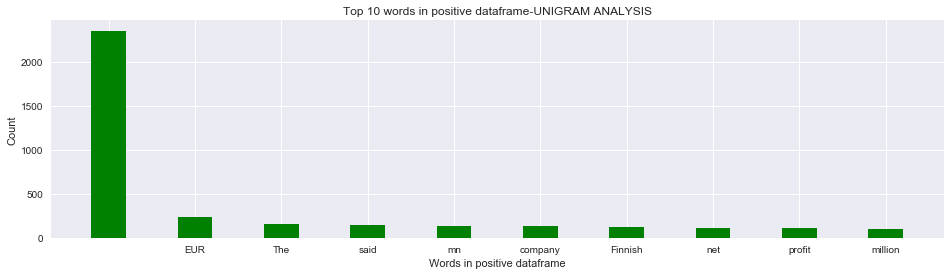

In [40]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

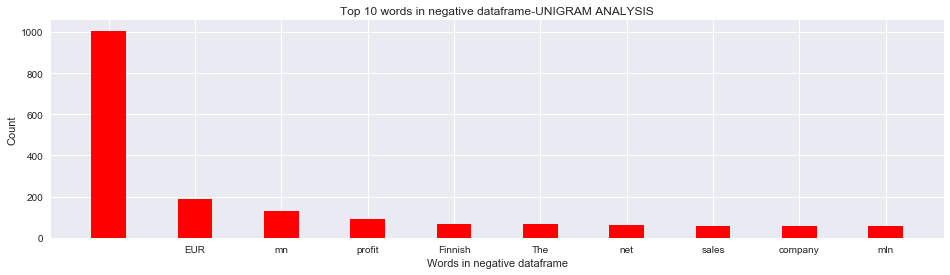

In [41]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

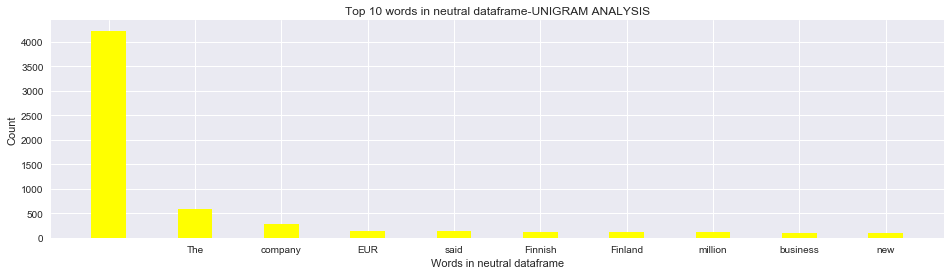

In [42]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [43]:
# 7. Creating bigrams:
# Repeat the same steps which we followed to analyze our data using unigrams except that you have to pass 
# parameter 2 while invoking the generate_N_grams() function.You can optionally consider changing the 
# names of the data frames, which I have done.

In [44]:
positiveValues2 = defaultdict(int)
negativeValues2 = defaultdict(int)
neutralValues2 = defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes.

In [45]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 1.sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['Finnish', 'telecoms', 'software', 'developer', 'Tecnomen', 'Oyj', 'said', 'December', '5', '', '2006', '', '33', 'mln', '', '25', 'mln', 'euro', '', 'order', 'supply', 'expansion', 'charging', 'messaging', 'systems', 'mobile', 'fixed', 'networks', 'Brasil', 'Telecom', '']
Sentence after removing stopwords: ['The', 'launch', 'plant', 'June', 'went', 'well', '', 'producing', 'advanced', 'fuel', 'couple', 'weeks', '']
Sentence after removing stopwords: ['BasWare', 'CEO', 'Ilkka', 'Sihvo', 'comments', 'conjunction', 'Interim', 'Report', '', '', 'As', 'whole', '', 'BasWare', 'succeeded', 'well', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'plans', 'expand', 'international', 'market', 'subsidiaries', 'distributors', '2011', 'onwards', '']
Sentence after removing stopwords: ['Outotec', 'said', 'new', 'orders', 'worth', '4929', 'mln', 'eur', 'quarter', '', 'compared', '2404', 'mln', 'eur', 'year', 'earlier', '']
Se

Sentence after removing stopwords: ['The', 'stock', 'price', 'rose', '700', 'ores', '09', '', 'close', 'SEK77', '65', '', 'ending', 'twoday', 'streak', 'losses', '']
Sentence after removing stopwords: ['Finnish', 'operator', 'Elisa', 'Aker', 'Yards', 'signed', 'longterm', 'service', 'deal', 'Elisa', 'deliver', 'necessary', 'voice', 'data', 'services', 'Aker', 'Yards', 'Finland', '']
Sentence after removing stopwords: ['Aspocomp', 'repaid', 'interest', 'bearing', 'liability', 'Standard', 'Chartered', 'Bank', 'use', 'rest', 'consideration', 'partially', 'repay', 'interest', 'bearing', 'liabilities', 'Finland', 'improve', 'liquidity', '']
Sentence after removing stopwords: ['Last', 'year', '', 'Lemminkainen', 'completed', 'Kouvola', 'Ksupermarket', 'contract', '']
Sentence after removing stopwords: ['The', 'optimization', 'steel', 'components', 'heating', 'process', 'reduce', 'energy', 'consumption', '']
Sentence after removing stopwords: ['According', 'Karhinen', '', 'OPPohjola', 'exciti

Sentence after removing stopwords: ['In', 'banking', '', 'Sampo', 'A', 'unchanged', '1424', 'eur', 'Nordea', 'rose', '042', 'pct', '951', 'eur', '']
Sentence after removing stopwords: ['Finnish', 'Bore', 'owned', 'Rettig', 'family', 'grown', 'recently', 'acquisition', 'smaller', 'shipping', 'companies', '']
Sentence after removing stopwords: ['Mobile', 'phone', 'sales', 'rose', '25', '', '587', 'billion', 'euros', '', 'enterprise', 'solution', 'sales', 'dropped', '39', '', '186', 'million', 'euros', '']
Sentence after removing stopwords: ['The', 'loss', 'third', 'quarter', '2007', 'EUR', '03', 'mn', 'smaller', 'loss', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['According', 'Nordic', 'financial', 'group', 'Nordea', 'analyst', 'Sami', 'Sarkamies', '', 'makes', 'Nokia', 'portfolio', 'competitive', '']
Sentence after removing stopwords: ['', 'Stonesoft', 'sees', 'great', 'promise', 'future', 'IPv6', '']
Sentence after removing stopwords: ['The', 'rebuilds', 'desig

Sentence after removing stopwords: ['Helsingin', 'Uutiset', '', 'Vantaan', 'Sanomat', 'Lansivayla', 'reach', '385000', 'readers', '', '40', '', 'consumers', 'greater', 'Helsinki', 'region', '']
Sentence after removing stopwords: ['', 'After', 'share', 'purchase', 'completed', '', 'financing', 'also', 'provided', 'expand', 'Latvia', 'broadband', 'infrastructure', 'develop', 'new', 'areas', 'business', '', 'including', 'acquisitions', 'companies', '', '']
Sentence after removing stopwords: ['Ragutis', '', 'based', 'Lithuania', 'secondlargest', 'city', 'Kaunas', '', 'boosted', 'sales', 'last', 'year', '223', 'per', 'cent', '364', 'million', 'liters', '']
Sentence after removing stopwords: ['Operating', 'profit', 'increased', 'EUR', '140', 'mn', 'EUR', '49', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['The', 'company', 'intends', 'raise', 'production', 'capacity', '2006', '']
Sentence after removing stopwords: ['', 'QPR', '8', 'integrated', 'management'

Sentence after removing stopwords: ['The', 'diluted', 'loss', 'per', 'share', 'narrowed', 'EUR', '027', 'EUR', '086', '']
Sentence after removing stopwords: ['Revenue', 'grew', '2', 'percent', '', 'x20ac', '580', 'million', '', '743', 'million', '', '', 'x20ac', '569', 'million', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '58', 'mn', '', 'loss', 'EUR', '17', 'mn', 'fourth', 'quarter', '2009', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Finnish', 'handling', 'systems', 'provider', 'Cargotec', 'Oyj', '', 'HEL', '', 'CGCBV', '', 'announced', 'Friday', 'orders', 'worth', 'EUR', '10', 'million', '', 'USD', '132', '', 'deliver', 'linkspans', 'Jordan', '', 'Morocco', 'Ireland', '']
Sentence after removing stopwords: ['Etteplan', 'targets', 'employ', 'least', '20', 'people', 'BorlÆnge', '']
Sentence after removing stopwords: ['The', 'metal', 'gained', '41', 'percent', 'year', 'demand', 'China', '', 'world', 'largest', 'user', '', '

Sentence after removing stopwords: ['KESKO', 'FOOD', 'LTD', 'PRESS', 'RELEASE', '04012006', 'AT', '1300', 'Kesko', 'Food', 'Ltd', 'launching', 'major', 'TV', 'campaign', 'recruit', 'many', 'one', 'hundred', 'new', 'Kfood', 'retailers', '']
Sentence after removing stopwords: ['The', 'effect', 'savings', 'noticeable', 'beginning', '2010', '']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '98', 'mn', '', 'compared', 'loss', 'EUR', '127', 'mn', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['HELSINKI', 'AFX', '', 'Outokumpu', 'said', 'technology', 'unit', '28', 'mln', 'eur', 'contract', 'BosniaHerzegovina', 'Aluminij', 'dd', 'Mostar', 'upgrade', 'anode', 'plant', '']
Sentence after removing stopwords: ['', 'It', 'gives', 'us', 'sense', 'pride', 'exposure', '', '', 'said', 'Bruce', 'Hansen', '', 'SVH', 'sales', 'representative', 'Wolverine', '']
Sentence after removing stopwords: ['The', 'company', 'anticipates', 'turnover', 'whole', '2010', '

Sentence after removing stopwords: ['The', 'investments', 'operational', 'changes', 'enable', 'additional', 'optimisation', 'working', 'hours', 'thereby', 'cost', 'savings', '7', '', '9', '', '']
Sentence after removing stopwords: ['Metso', 'expects', 'net', 'sales', 'increase', '10', '', '2008', '', 'comparable', 'exchange', 'rates', '']
Sentence after removing stopwords: ['Hkan', 'Dahlstr¦m', '', 'head', 'mobility', 'services', 'TeliaSonera', '', 'forecast', 'mobile', 'data', 'volume', 'TeliaSonera', 'network', 'Sweden', 'rise', 'eightfold', '200000', 'TB', '2014', '']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', '2008', 'increase', '510', '', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'intensifying', 'smelter', 'operations', 'increasing', 'annual', 'production', 'capacity', '230000', 'tonnes', 'copper', '']
Sentence after removing stopwords: ['Besides', 'increased', 'share', 'meat', 'various', 'sausages', 'offering', 'number

Sentence after removing stopwords: ['The', 'antibody', '', 'given', 'repeated', 'doses', '8', 'mgkg', '', 'generally', 'well', 'tolerated', '', 'pharmacokinetic', 'characteristics', 'BTT1023', 'psoriasis', 'patients', 'consistent', 'observed', 'previously', 'completed', 'study', 'rheumatoid', 'arthritis', 'RA', 'patients', '']
Sentence after removing stopwords: ['', 'This', 'vessel', 'order', 'help', 'Aspo', 'secure', 'longterm', 'competitiveness', 'fleet', '', 'terms', 'technology', 'pricing', '']
Sentence after removing stopwords: ['The', 'aim', 'convert', 'plants', 'flexible', 'manufacturers', 'new', 'technologically', 'demanding', 'products', '']
Sentence after removing stopwords: ['It', 'focus', 'improving', 'profitability', 'next', 'year', 'streamlining', 'operations', '']
Sentence after removing stopwords: ['NAVTEQ', 'commanding', 'lead', 'installed', 'map', 'data', 'systems', 'North', 'American', 'vehicles', 'may', 'leader', 'turnbyturn', 'navigation', 'data', 'offered', 'servi

Sentence after removing stopwords: ['Bilfinger', 'investors', 'cheered', 'agreement', '', 'pushing', 'shares', '7', '', '', '', 'euro', '', '330', '', '', 'euro', '', '5029', '', 'afternoon', 'trade', '']
Sentence after removing stopwords: ['According', 'Schmardin', '', 'Nordea', 'likely', 'try', 'win', 'customers', 'pension', 'fund', 'providers', '']
Sentence after removing stopwords: ['Nordea', 'sees', 'return', 'positive', 'growth', 'Baltic', 'countries', '2011', '']
Sentence after removing stopwords: ['This', 'combined', 'foreign', 'investments', 'creates', 'interesting', 'opportunities', 'Solteq', '']
Sentence after removing stopwords: ['With', 'measures', '', 'Suominen', 'Corporation', 'aims', 'ensure', 'competitiveness', 'Flexible', 'Packaging', 'business', 'long', 'term', '']
Sentence after removing stopwords: ['Net', 'sales', 'increased', 'EUR655m', 'April', 'June', '2010', 'EUR438m', 'year', 'earlier', '']
Sentence after removing stopwords: ['Finnish', 'GeoSentric', '', 'deve

Sentence after removing stopwords: ['Kazgiprotsvetmet', 'Outotec', 'Finland', 'signed', 'agreement', 'strategic', 'cooperation', 'marketing', 'providing', 'minerals', 'processing', 'metallurgical', 'plants', 'related', 'services', 'Kazakhstan', 'surrounding', 'countries', '']
Sentence after removing stopwords: ['Net', 'interest', 'income', 'EUR', '393', 'mn', '', 'EUR', '327', 'mn', '']
Sentence after removing stopwords: ['', 'PO', 'Ferries', 'efficient', 'powerful', 'vessel', 'Dover', 'Calais', 'route', '', '', 'head', 'shipbuilder', 'Rauma', 'yard', '', 'Timo', 'Suistio', '', 'said', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Sep', '30', '', '2008', '', 'Finnish', 'security', 'privacy', 'software', 'solutions', 'developer', 'Stonesoft', 'Oyj', 'said', 'today', 'USD', '19', 'million', '', 'EUR', '13', '', 'order', 'deliver', 'StoneGate', 'network', 'security', 'products', 'unnamed', 'Russian', 'te']
Sentence after removing stopwords: ['ASPO', 'Plc', 'STOCK', '

Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Oct', '1', '', '2008', '', 'Finnish', 'consulting', 'engineering', 'company', 'Poyry', 'Oyj', '', 'OMX', '', 'POY1V', '', 'said', 'today', 'awarded', 'EUR', '52', 'million', '', 'USD', '74', '', 'extension', 'existing', 'consultancy', 'engineering', 'contract', 'Venezuel']
Sentence after removing stopwords: ['', 'Neste', 'Oil', 'working', '20', 'research', 'communities', 'Europe', '', 'America', '', 'Africa', '', 'Asia', '', 'Australia', 'develop', 'introduce', 'new', 'raw', 'materials', '']
Sentence after removing stopwords: ['The', 'decision', 'sell', 'share', 'Lenenergo', 'reached', 'line', 'Fortum', 'strategic', 'plans', 'invest', 'mainly', 'generating', 'assets', 'Russia', '', 'Lenenergo', 'grid', 'company', '', 'press', 'release', 'said', '']
Sentence after removing stopwords: ['Profit', 'taxes', 'EUR', '54', 'mn', '', 'EUR', '36', 'mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'Brazilian', '

Sentence after removing stopwords: ['', 'Our', 'customers', 'chance', 'make', 'bookings', 'services', 'want', 'one', 'location', '', '', 'said', 'Mikko', 'Tuomainen', '', 'incharge', 'Finnair', 'Internet', '', 'sales', '', '']
Sentence after removing stopwords: ['Theodosopoulos', 'said', 'Tellabs', 'could', 'value', 'Nokia', 'Siemens', 'Nortel', 'given', '', 'leading', 'supply', 'status', '', 'Verizon', '', 'along', 'highgrowth', 'products', '']
Sentence after removing stopwords: ['20', 'October', '2010', '', 'Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', 'HEL', '', 'CTH1V', 'said', 'yesterday', 'net', 'loss', 'narrowed', 'EUR7m', 'first', 'nine', 'months', '2010', 'EUR23', '3', 'period', '2009', '']
Sentence after removing stopwords: ['The', 'growth', 'net', 'sales', 'continued', 'favourably', 'Middle', 'East', 'Africaand', 'Asia', 'Pacific', '']
Sentence after removing stopwords: ['Section', '', 'Regional', 'News', '', 'The', 'demand', 'Finnair', 'Asian', 'traffic', 

Sentence after removing stopwords: ['Finnish', 'silicon', 'wafer', 'technology', 'company', 'Okmetic', 'Oyj', 'OMX', 'Helsinki', '', 'OKM1V', 'reported', 'Thursday', '30', 'October', 'operating', 'profit', 'EUR7', '4', 'JanuarySeptember', '2008', '', 'EUR6', '1', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['The', 'economic', 'occupancy', 'rate', 'Sponda', 'property', 'portfolio', 'rose', '912', '', '888', '', '2006', '']
Sentence after removing stopwords: ['', 'This', 'significant', 'milestone', 'Benefon', '', 'helping', 'us', 'secure', 'critical', 'USP', 'personal', 'navigation', 'product', 'roadmap', '2007', 'beyond', '', '', 'commented', 'Simon', 'Button', '', 'Chief', 'Technology', 'Officer', 'Benefon', '']
Sentence after removing stopwords: ['Finnish', 'consulting', 'engineering', 'group', 'Poyry', 'Plc', '', 'OMX', 'Helsinki', '', 'POY', '', 'said', 'Wednesday', '', '1', 'October', '', 'awarded', 'contract', 'Tanqia', 'Dibba', 'FZC', 'ownerengineer'

Sentence after removing stopwords: ['Precedex', 'approved', 'IV', 'sedation', 'initially', 'intubated', 'mechanically', 'ventilated', 'patients', 'intensive', 'care', '']
Sentence after removing stopwords: ['A', 'portion', '', '', '125', 'million', '', 'recorded', 'part', 'winnings', 'prior', 'patent', 'dispute', 'Finnish', 'phone', 'maker', 'Nokia', 'Oyj', '']
Sentence after removing stopwords: ['', 'After', 'long', '', 'unprofitable', 'period', 'Food', 'Division', 'posted', 'profitable', 'result', '', 'speaks', 'healthier', 'cost', 'structure', 'new', 'approach', 'business', 'operations', '', '', 'Rihko', 'said', '']
Sentence after removing stopwords: ['Mobile', 'phone', 'shipments', 'jumped', '26', 'percent', 'almost', '112', 'million', 'units', '', 'Finnish', 'company', 'global', 'market', 'share', 'rose', '39', 'percent', '36', 'percent', '']
Sentence after removing stopwords: ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 's

Sentence after removing stopwords: ['Savon', 'koulutuskuntayhtyma', '', 'Finland', 'based', 'company', 'awarded', 'contract', 'specialist', 'agricultural', 'forestry', 'machinery', '']
Sentence after removing stopwords: ['The', 'bank', 'sees', 'potential', 'Getinge', 'share', 'rise', '']
Sentence after removing stopwords: ['Sales', 'came', '241', 'mln', 'eur', '', 'compared', '2114', 'mln', '', 'also', 'beating', 'consensus', 'forecasts', '235', 'mln', 'eur', '']
Sentence after removing stopwords: ['The', 'stock', 'rose', 'third', 'day', 'Tuesday', 'bringing', 'threeday', 'rise', 'GBX10', '50', '18', '', '']
Sentence after removing stopwords: ['Renzo', 'Piano', 'building', 'design', 'wonderful', 'addition', 'London', 'skyline', '', '', 'says', 'Noud', 'Veeger', '', 'EVP', 'Area', 'Director', 'Central', 'North', 'Europe', 'KONE', '']
Sentence after removing stopwords: ['The', 'robust', 'growth', 'result', 'inclusion', 'clothing', 'chain', 'Lindex', 'Group', 'December', '2007', '']
Sente

Sentence after removing stopwords: ['The', 'sale', '', 'result', 'gain', 'EUR', '60', 'million', 'second', 'quarter', '2010', 'OriolaKD', '', 'supports', 'Finnish', 'company', 'strategy', 'focus', 'pharmaceutical', 'wholesale', 'retail', 'operations', '']
Sentence after removing stopwords: ['The', 'core', 'Solidium', 'investment', 'strategy', 'proper', '', 'value', 'enhancing', 'asset', 'management', 'current', 'holdings', '']
Sentence after removing stopwords: ['Operating', 'profit', 'ninemonth', 'period', 'increased', 'EUR3', '1', 'net', 'sales', 'increased', 'EUR61', '5', '', 'compared', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Sanoma', 'Magazines', '', 'net', 'sales', 'estimated', 'grow', '2006', '']
Sentence after removing stopwords: ['Componenta', 'objective', 'agreement', 'increase', 'business', 'existing', 'production', 'lines', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '311', 'mn', 'EUR', '122', 'mn', 'corr

In [46]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 2.sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['Orion', 'net', 'profit', 'third', 'quarter', '2007', 'decreased', '365', 'mln', 'euro', '', '', '521', 'mln', '', '403', 'mln', 'euro', '', '', '575', 'mln', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', '', 'net', 'sales', 'decreased', 'EUR', '1214', 'mn', 'EUR', '1655', 'mn', 'fourth', 'quarter', '2007', '']
Sentence after removing stopwords: ['A', 'high', 'court', 'Finland', 'fined', 'seven', 'local', 'asphalt', 'companies', '', '', 'lion', '', '', '117', 'million', '', 'operating', 'cartel', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '67', 'mn', '', 'EUR', '72', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['UPMKymmene', 'Corp', '', 'world', 'largest', 'maker', 'magazine', 'paper', '', 'Tuesday', 'reported', '19percent', 'profit', 'drop', 'lower', 'paper', 'prices', '', 'higher', 'costs', 'strong', 'euro', 'hurt', 'revenue

Sentence after removing stopwords: ['Sales', 'Tiimari', 'business', 'went', '8', '', 'EUR', '118', 'million', '', 'Gallerix', 'stores', 'saw', '29', '', 'growth', 'EUR', '2', 'million', '']
Sentence after removing stopwords: ['Pretax', 'loss', 'totaled', 'EUR', '117mn', 'compared', 'loss', 'EUR', '65mn', 'corresponding', 'period', '']
Sentence after removing stopwords: ['25', 'March', '2011', '', 'Finnish', 'electronics', 'contract', 'manufacturer', 'Scanfil', 'Oyj', 'HEL', '', 'SCF1V', 'said', 'today', 'plan', 'merge', 'wholly', 'owned', 'Scanfil', 'EMS', 'Group', 'OjalaYhtyma', 'Oy', 'hit', 'snag', 'shareholders', 'domestic', 'rival', 'rejected', 'deal', '']
Sentence after removing stopwords: ['Operating', 'profit', 'fell', 'EUR', '354', 'mn', 'EUR', '688', 'mn', '2007', '', 'including', 'vessel', 'sales', 'gain', 'EUR', '123', 'mn', '']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', '', 'Inc', 'begin', 'personnel', 'negotiations', 'temporary', 'layoffs', 'per

Sentence after removing stopwords: ['Profit', 'period', 'totalled', 'EUR', '08', 'mn', '', 'EUR', '11', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'totaled', 'EUR', '54', 'mn', 'compared', 'EUR', '55', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Applying', 'summer', 'work', 'seen', 'laborious', 'stressful', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'comparable', 'operating', 'profit', 'JanuaryJune', 'period', 'fell', 'short', 'last', 'year', 'corresponding', 'performance', '']
Sentence after removing stopwords: ['Agricultural', 'newspaper', 'Maaseudun', 'Tulevaisuus', '318000', 'readers', '', 'representing', 'decrease', '6', '', '']
Sentence after removing stopwords: ['In', 'addition', '', 'production', 'Varpaisj', 'rvi', 'factory', 'stopped', 'beginning', 'April', '2009', '']
Sentence after removing stopwords: ['ADP', 'News', 

Sentence after removing stopwords: ['Finnish', 'financial', 'software', 'solutions', 'developer', 'BasWare', 'Oyj', 'said', 'net', 'profit', 'fell', '884000', 'euro', '', '', '12', 'mln', '', 'first', 'quarter', '2007', '20', 'mln', 'euro', '', '', '27', 'mln', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['Changes', 'market', 'situation', 'tougher', 'price', 'competition', 'substantially', 'reduced', 'demand', 'bread', 'packaging', 'manufactured', 'Kauhava', 'plant', '', 'according', 'company', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'group', 'Ruukki', 'Group', 'brought', 'counter', 'action', 'Finnish', 'metal', 'company', 'Rautaruukki', 'dispute', 'concerning', 'names', 'companies', '']
Sentence after removing stopwords: ['However', '', 'net', 'sales', 'declined', 'EUR', '8036', 'million', 'EUR', '12', 'billion', '']
Sentence after removing stopwords: ['The', 'low', 'capacity', 'utilisation', 'rate', 'steel', 'production', 'considerably', 'in

Sentence after removing stopwords: ['In', 'Baltic', 'states', 'company', 'reports', 'net', 'sales', 'EUR', '119', 'mn', '', 'EUR', '142', 'mn', '', 'operative', 'EBIT', 'EUR', '22', 'mn', '', 'EUR', '17', 'mn', '']
Sentence after removing stopwords: ['The', 'first', 'ship', 'delayed', 'estimated', 'completed', 'spring', '2010', '']
Sentence after removing stopwords: ['The', 'total', 'number', 'filling', 'stations', 'decrease', 'recently', '']
Sentence after removing stopwords: ['According', 'Finnish', 'petrol', 'station', 'chain', 'St1', 'managing', 'director', 'Kim', 'Wiio', '', 'company', 'forced', 'make', 'purchases', 'rising', 'prices', 'first', 'half', '2008', '', 'consumer', 'prices', 'going', 'almost', 'daily', 'due', 'competition', '']
Sentence after removing stopwords: ['Revenue', 'quarter', 'totaled', '274', 'billion', '', '2', 'percent', '281', 'billion', 'fourth', 'quarter', '2008', '']
Sentence after removing stopwords: ['Vaisala', 'net', 'profit', 'third', 'quarter', '200

Sentence after removing stopwords: ['The', 'SeaWind', 'en', 'route', 'Finnish', 'port', 'Turku', 'Stockholm', 'got', 'stuck', 'ice', 'already', 'around', '4', 'pm', 'Wednesday', 'Regal', 'Star', 'journey', 'Swedish', 'port', 'Kapellskar', 'Paldiski', 'northwestern', 'Estonia', 'cut', 'short', '2', 'Thursday', '']
Sentence after removing stopwords: ['YIT', 'Baltic', 'sales', 'first', 'three', 'quarters', '2008', 'totaled', '1062', 'million', 'euros', '', 'representing', 'drop', '29', 'percent', 'year', 'year', '']
Sentence after removing stopwords: ['', 'Small', 'firms', 'suffering', 'moment', 'likely', 'money', 'trouble', '', '', 'added', '']
Sentence after removing stopwords: ['Loss', 'period', 'totalled', 'EUR', '156', 'mn', 'compared', 'profit', 'EUR', '63', 'mn', '2008', '']
Sentence after removing stopwords: ['Hobby', 'Hall', 'sales', 'decrease', '26', 'pct', 'due', 'implementing', 'new', 'information', 'system', 'involved', 'changing', 'principal', 'posting', 'sales', '']
Sentenc

Sentence after removing stopwords: ['The', 'contracts', 'employees', '', '96', 'bluecollar', 'workers', '', 'ended', 'March', 'August', '2011', '']
Sentence after removing stopwords: ['The', 'Finnish', 'national', 'carrier', 'said', 'net', 'loss', 'April', 'June', 'euro26', 'million', '', 'net', 'profit', 'euro13', 'million', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'net', 'sales', 'whole', 'fiscal', 'year', '2008', 'lower', '2007', 'operating', 'profit', 'estimated', 'negative', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Feb', '11', '', '2009', '', 'Finnish', 'wood', 'products', 'technology', 'supplier', 'Raute', 'Oyj', '', 'HEL', '', 'RUTAV', '', 'said', 'today', 'net', 'profit', 'decreased', 'EUR', '47', 'million', '', 'USD', '61', '', '2008', 'EUR', '66', 'million', '2007', '']
Sentence after removing stopwords: ['Finnish', 'electronics', 'manufacturing', 'services', 'EMS', 'company', 'Elcoteq', 'SE', 'posted', 'net', 'loss', '664',

In [47]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 3.sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['After', 'acquisition', '', 'Basware', 'preliminary', 'pro', 'forma', 'net', 'sales', '2005', 'amount', 'EUR', '526', 'mn', '', 'preliminary', 'pro', 'forma', 'operating', 'profit', 'amounts', 'EUR', '71', 'mn', '']
Sentence after removing stopwords: ['The', 'Group', '', 'net', 'sales', 'EUR', '235', 'million', '2009', '', 'employs', '2', '000', 'people', '33', 'countries', '']
Sentence after removing stopwords: ['CHS', 'Expo', 'Freight', 'major', 'Finnish', 'fair', '', 'exhibition', 'culture', 'logistics', 'company', 'provides', 'logistics', 'services', 'various', 'events', 'land', '', 'air', 'sea', '']
Sentence after removing stopwords: ['The', 'figure', 'include', 'food', 'exports', 'Finland', '']
Sentence after removing stopwords: ['Cardona', 'slowed', 'vehicle', '', 'turned', 'around', 'returned', 'intersection', '', 'called', '911', '']
Sentence after removing stopwords: ['cents', 'The', 'profile', 'contains', 'business', 'operations', '', 'com

Sentence after removing stopwords: ['Why', 'put', 'costly', 'cell', 'phone', 'towers', 'thinly', 'populated', 'areas', 'balloons', 'would', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'deal', 'USD', '29mn', '']
Sentence after removing stopwords: ['cents', 'Recognize', 'potential', 'partnerships', 'suppliers', '']
Sentence after removing stopwords: ['All', 'charges', 'dismissed', '']
Sentence after removing stopwords: ['Net', 'sales', 'SataFlexo', 'Group', 'came', 'EUR4', '3', '2007', '', 'group', 'companies', 'employed', 'total', '40', 'people', '']
Sentence after removing stopwords: ['The', 'first', 'installment', 'Cinema', 'Series', 'concludes', 'profile', 'Finnish', 'inventor', 'Olavi', 'Linden', '', 'whose', 'personal', 'artistic', 'journey', 'work', 'Fiskars', 'led', 'dozens', 'design', 'awards', '']
Sentence after removing stopwords: ['The', 'acquired', 'plant', 'annual', 'capacity', '300000', 'tonnes', 'production', 'sold', 'domestic', 'customers', '']
Sente

Sentence after removing stopwords: ['Before', 'FKI', '', 'John', 'Jiang', 'worked', 'several', 'general', 'manager', 'senior', 'business', 'consultant', 'positions', 'international', 'companies', 'China', '']
Sentence after removing stopwords: ['Under', 'contract', '', 'Ericsson', 'double', 'number', 'radio', 'base', 'stations', 'Elisa', 'network', 'coming', 'year', '']
Sentence after removing stopwords: ['The', 'contract', 'value', 'amounts', 'EUR', '24', 'million', '']
Sentence after removing stopwords: ['COPYRIGHT', 'AFX', 'News', 'AFX', 'Financial', 'News', 'Logo', 'registered', 'trademarks', 'AFX', 'News', 'Limited']
Sentence after removing stopwords: ['The', 'works', 'include', 'laying', 'natural', 'stone', 'pavements', 'installation', 'underground', 'heating', '', 'surface', 'water', 'drainage', 'systems', '']
Sentence after removing stopwords: ['The', 'company', 'equipment', 'rental', 'portfolio', 'consists', 'primarily', 'tools', 'small', 'midsized', 'customers', 'construction

Sentence after removing stopwords: ['A', 'total', '131000', 'Talvivaara', 'Mining', 'Company', 'Plc', 'new', 'shares', 'subscribed', 'period', 'May', '1', '', '2010', 'June', '30', '', '2010', 'company', 'stock', 'option', 'rights', '2007A', '']
Sentence after removing stopwords: ['', 'As', 'part', 'Eseries', 'business', 'promise', '', 'Nokia', 'E50', 'equipped', 'variety', 'email', 'solutions', 'small', 'stylised', 'package', '', '', 'said', 'Dave', 'Grannan', '', 'general', 'manager', '', 'Enterprise', 'Solutions', '', 'Nokia', '']
Sentence after removing stopwords: ['Cargotec', 'sales', 'totalled', 'EUR', '34', 'billion', '2008', 'employs', 'approximately', '10500', 'people', '']
Sentence after removing stopwords: ['Mr', 'Skogster', 'currently', 'serves', 'manager', 'responsible', 'ABB', 'Oy', 'system', 'modules', 'low', 'voltage', 'drives', '']
Sentence after removing stopwords: ['Previously', '', 'company', 'also', 'delivered', '70', '', 'steel', 'used', 'Oasis', 'Seas', '', 'Allu

Sentence after removing stopwords: ['Body', 'ES', 'Vostok', 'also', 'owns', 'stakes', 'power', 'sales', 'companies', 'MosenergosbytBody', '', 'RTS', '', 'MSSB', '', '', '509', '', '', '', 'Altaienergosbyt', '', '100', '', '', '', 'Saratovenergo', '', 'RTS', '', 'SARE', '', 'Body', '', '4836', '', '', 'Tambov', 'Power', 'Sales', 'Company', '', 'RTS', '', 'TASB', '', '', '4901', '', '', '', 'ofBodywhich', 'received', 'distribution', 'balance', '']
Sentence after removing stopwords: ['It', 'estimated', 'consolidated', 'turnover', 'Kausta', 'Guder', 'reach', 'Lt', '53mn', 'US', '2253', 'mn', 'EUR', '1535', 'mn', '2007', '']
Sentence after removing stopwords: ['JVC', 'stop', 'producing', 'DVD', 'players', 'Brazil', '', 'JVC', 'Brazil', '', 'subsidiary', 'Japan', 'JVC', 'group', 'announced', 'stop', 'production', 'DVD', 'players', 'Brazil', '']
Sentence after removing stopwords: ['Auburn', 'sales', '2007', 'CAD', '41', 'million', '', 'approximately', 'EUR', '27', 'million', '', '', 'company'

Sentence after removing stopwords: ['TyrvÆinen', 'opinion', 'airline', 'repeating', 'time', 'already', '', 'however', '']
Sentence after removing stopwords: ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords: ['The', 'ore', 'body', 'sufficient', 'support', 'anticipated', 'production', 'least', '46', 'years', '']
Sentence after removing stopwords: ['The', 'Bank', 'also', 'examining', 'benefits', 'transferring', 'Swedish', 'business', 'operate', 'branch', 'office', 'operations', 'would', 'governed', 'Finland', 'laws', '']
Sentence after removing stopwords: ['Risto', 'Jalo', '', 'chief', 'executive', 'Dormus', 'Print', 'also', 'owner', 'remainder', 'company', '', 'keep', 'position', 'acquisition', '']
Sentence after rem

Sentence after removing stopwords: ['Solteq', 'Plc', 'ANNOUNCEMENT', '16122010', 'SHARE', 'REPURCHASE', '16122010', 'In', 'Helsinki', 'Stock', 'Exchange', 'Solteq', 'Plc', 'holds', 'total', '486969', 'shares', 'including', 'shares', 'repurchased', '16122010', '']
Sentence after removing stopwords: ['The', 'Swedish', 'buyout', 'firm', 'sold', 'remaining', '224', 'percent', 'stake', '', 'almost', 'eighteen', 'months', 'taking', 'company', 'public', 'Finland', '']
Sentence after removing stopwords: ['Vaisala', 'Oyj', 'Stock', 'exchange', 'release', '26032010', 'klo', '0900', '1', '', '1', '', 'The', 'Annual', 'General', 'Meeting', 'Vaisala', 'Oyj', 'decided', 'March', '25', '', '2010', 'approve', 'Company', 'annual', 'accounts', '2009', '']
Sentence after removing stopwords: ['All', 'YIT', 'Capital', 'Markets', 'Day', 'materials', 'available', 'company', 'Internet', 'site', 'wwwyitgroupcominvestors', '1030', 'September', '26', '']
Sentence after removing stopwords: ['When', 'dialing', '',

Sentence after removing stopwords: ['Ahlstrom', 'share', 'quoted', 'NASDAQ', 'OMX', 'Helsinki', '']
Sentence after removing stopwords: ['A', 'employees', 'would', 'remain', 'Oulu', 'plant', 'support', 'functions', 'group', 'units', '']
Sentence after removing stopwords: ['The', 'contract', 'incorporates', 'Convergent', 'Charging', 'rating', 'solution', 'voice', 'data', '', 'includes', 'Internet', '', 'GPRS', '', 'SMS', '', 'MMS', 'WAP', '']
Sentence after removing stopwords: ['The', 'payment', 'date', 'March', '25', '', '2010', '']
Sentence after removing stopwords: ['Therefore', '', 'Phase', 'III', 'research', 'conducted', 'Abbott', '']
Sentence after removing stopwords: ['The', 'operator', 'one', '6', 'operators', 'granted', 'WiMAX', 'license', 'Taiwan', '', 'hopes', 'first', 'launch', 'commercial', 'services', 'early', '2009', '']
Sentence after removing stopwords: ['The', 'two', 'sellers', 'Finnish', 'National', 'Fund', 'RD', '', 'Sitra', '', 'Oras', 'Invest', 'Oy', '', 'also', 'so

Sentence after removing stopwords: ['The', 'authorization', 'force', 'period', '18', 'months', 'resolution', 'General', 'Meeting', '']
Sentence after removing stopwords: ['The', 'contract', 'covers', 'supply', 'temporary', 'heating', 'equipment', 'LKAB', 'new', 'pellet', 'plant', 'Kiruna', '', 'northern', 'Sweden', '']
Sentence after removing stopwords: ['The', 'new', 'system', '', 'include', '60', 'MC3090', 'PDAs', 'Motorola', '', 'used', '60', 'Poundstretcher', 'operatives', 'across', '3', 'shifts', '', 'integrate', 'realtime', 'company', 'existing', 'Warehouse', 'Management', 'System', '', 'Aldata', 'GOLD', 'Stock', '', 'went', 'live', 'May', '2008', '']
Sentence after removing stopwords: ['We', 'bring', 'new', '', 'committed', 'leadership', 'business', 'strategic', 'knowhow', 'company', 'buy', '']
Sentence after removing stopwords: ['Dutch', 'publisher', 'De', 'Vijver', 'said', 'today', 'agreed', 'buy', '49', '', 'stake', 'Belgian', 'weekly', 'magazine', 'Humo', 'Finnish', 'media',

Sentence after removing stopwords: ['In', 'addition', 'software', 'development', '', 'new', 'design', 'unit', 'provide', 'mechanical', 'engineering', 'electronics', 'design', '']
Sentence after removing stopwords: ['An', 'additional', 'amount', '', 'capped', 'EUR12m', '', 'payable', 'cash', 'upon', 'achievement', 'certain', 'financial', 'performance', 'targets', '2007', '']
Sentence after removing stopwords: ['The', 'challenge', 'company', '', 'however', '', 'finding', 'new', 'sources', 'raw', 'material', '', 'said', 'Risto', 'Rinne', '', 'CEO', 'Neste', 'Oil', '']
Sentence after removing stopwords: ['The', 'revenues', 'business', 'reached', 'NOK', '12', 'million', '2008', '']
Sentence after removing stopwords: ['It', 'difficult', 'become', 'Google', 'Analytics', 'channel', 'partner', '']
Sentence after removing stopwords: ['Stock', 'Exchange', 'Release', '1032011', '1200', 'Sanoma', 'published', 'Annual', 'Report', 'Financial', 'Statements', '2010', 'first', 'Corporate', 'Responsibili

Sentence after removing stopwords: ['The', 'authorisation', 'force', 'end', 'next', 'Annual', 'General', 'Meeting', 'repeals', 'authorisation', 'acquire', 'shares', 'given', 'General', 'Meeting', 'held', 'April', '4', '', '2007', '']
Sentence after removing stopwords: ['Koff', 'market', 'share', 'volume', 'market', '234', '', '', 'Karhu', '214', '', '']
Sentence after removing stopwords: ['Finnish', 'food', 'company', 'Raisio', 'Oyj', 'HEL', '', 'RAIVV', 'said', 'Friday', 'wrapped', 'divestment', 'margarine', 'operations', 'US', 'sector', 'player', 'Bunge', 'Ltd', 'NYSE', '', 'BG', 'EUR80m', 'USD119', '2', '']
Sentence after removing stopwords: ['This', 'order', '', 'delivered', '', 'bring', 'total', 'output', 'electricity', 'Italy', 'generated', 'Wartsila', 'equipment', '1300', 'MW', '']
Sentence after removing stopwords: ['The', 'purchase', 'sites', 'worth', '300', 'million', 'Thames', 'Gateway', 'provide', '1200', 'homes', '']
Sentence after removing stopwords: ['BG', 'Crane', 'stro

Sentence after removing stopwords: ['The', '2500passenger', 'ferry', 'dimensions', '185', 'length', 'overall', '', '170', 'length', 'perpendiculars', '', '2770', 'breadth', '655', 'design', 'draught', '']
Sentence after removing stopwords: ['The', 'new', 'activity', 'incur', 'investment', '5', 'MEUR', '']
Sentence after removing stopwords: ['Being', 'successful', 'requires', 'providing', 'level', 'quality', 'satisfies', 'customers', 'partners', '']
Sentence after removing stopwords: ['ABN', '', '59', '087', '901', '620', 'represent', '510', '', 'voting', 'rights', 'share', 'capital', 'Citycon', 'Oyj', '']
Sentence after removing stopwords: ['An', 'acquisition', 'TeliaSonera', 'would', 'France', 'Telecom', 'biggest', 'since', '2000', 'purchase', 'Orange', 'plc', '', '278', 'billion', '', '', '551', 'billion', '', 'would', 'create', 'world', 'fourthlargest', 'telecom', 'company', 'behind', 'ATT', 'Inc', '', 'Verizon', 'Communications', 'Inc', 'NTT', 'Corp', 'Japan', '']
Sentence after re

Sentence after removing stopwords: ['The', 'bank', 'VTB24', 'provides', 'mortgage', 'loans', 'buy', 'apartments', 'complex', '1113', '', 'per', 'annum', 'rubles', '']
Sentence after removing stopwords: ['It', 'appears', 'statistics', 'Technical', 'Surveillance', 'Authority', 'customers', 'switch', 'service', 'providers', 'mostly', 'transfer', 'numbers', 'Elisa', 'network', '']
Sentence after removing stopwords: ['This', 'would', 'huge', 'process', '']
Sentence after removing stopwords: ['You', 'alone', '']
Sentence after removing stopwords: ['To', 'showcase', 'endtoend', 'capabilities', 'Mobile', 'World', 'Congress', '', 'arranged', 'internal', 'MeeGo', 'application', 'development', 'competition', 'entice', 'developers', 'create', 'new', 'applications', '']
Sentence after removing stopwords: ['Approximately', 'SEK', '166', 'million', 'repayments', 'demanded', 'overcharging', 'Stockholm', 'area', '', 'remaining', 'SEK', '87', 'million', 'taken', 'Western', 'coast', '', 'inspectorate', '

Sentence after removing stopwords: ['Alma', 'Media', 'Corporation', 'Press', 'Release', '15', 'March', '2010', 'TYRVAAN', 'SANOMAT', 'AND', 'PAIKALLISSANOMAT', 'BEING', 'BOUGHT', 'BY', 'SUOMEN', 'PAIKALLISSANOMAT', 'Two', 'local', 'papers', '', 'Tyrvaan', 'Sanomat', 'Paikallissanomat', '', 'appearing', 'Sastamala', 'neighbouring', 'municipalities', '', 'bought', 'Suomen', 'Paikallissanomat', 'Oy', '']
Sentence after removing stopwords: ['The', 'deal', 'includes', 'entire', 'personnel', 'PlanMill', 'Oy', '', 'transfer', 'new', 'company', 'socalled', 'old', 'employees', '']
Sentence after removing stopwords: ['And', 'Ogden', 'reportedly', 'shell', '', '42', 'million', '']
Sentence after removing stopwords: ['The', 'contract', 'value', 'amounts', 'EUR11m', '', 'company', 'added', '']
Sentence after removing stopwords: ['Taking', 'cue', 'playbook', 'East', 'Dillon', 'Lions', '', 'created', 'special', 'team', 'heavyhitting', 'style', 'players', '', 'bootcut', 'jeans', '', 'tummy', 'tops', '

Sentence after removing stopwords: ['ALEXANDRIA', '', 'Va', '', 'July', '11', '', 'Hannu', 'Kahonen', 'Juuka', '', 'Finland', '', 'developed', 'ornamental', 'design', 'handle', 'fire', 'pit', 'door', '', 'US', 'Patent', '', 'Trademark', 'Office', 'announced', '']
Sentence after removing stopwords: ['According', 'Ultrascan', '', 'software', 'acquired', 'crackers', '', 'managed', 'change', 'mobile', 'phone', 'way', 'phone', 'able', 'get', 'hold', 'onetime', 'password', 'sent', 'bank', 'via', 'text', 'message', '']
Sentence after removing stopwords: ['The', 'Finnish', 'business', 'delegation', 'includes', 'representatives', '20', 'companies', 'include', 'Nokia', 'Corp', '', 'Finnfund', '', 'Outokumpu', 'Oyj', '', 'OKO', 'Bank', '', 'Alteams', 'Oy', 'Cargotec', 'Corp', '']
Sentence after removing stopwords: ['It', 'several', 'innovative', 'small', 'molecule', 'biological', 'drug', 'candidates', 'different', 'stages', 'clinical', 'development', '']
Sentence after removing stopwords: ['Outot

Sentence after removing stopwords: ['The', 'availability', 'Internet', 'services', 'highlighted', 'service', 'offer', 'Kesko', 'KGroup', 'stores', '']
Sentence after removing stopwords: ['Bovine', 'slaughtering', 'cutting', 'Kuopio', 'facility', 'transferred', 'Kauhajoki', 'slaughterhouse', '']
Sentence after removing stopwords: ['The', 'results', 'enable', 'preparation', 'conceptual', 'plant', 'design', 'capital', 'estimates', '']
Sentence after removing stopwords: ['He', 'report', 'CapMan', 'Plc', 'CEO', 'Heikki', 'Westerlund', '']
Sentence after removing stopwords: ['The', 'extracted', 'filtrates', 'high', 'clarity', 'dried', 'filter', 'cakes', 'meet', 'required', 'transport', 'moisture', 'limits', 'TMLsfor', 'ore', 'grades', '']
Sentence after removing stopwords: ['Vacon', 'controls', '5', '', 'company', 'via', 'investment', 'fund', 'Power', 'Fund', 'I', 'EUR', '10', '', 'USD', '1397']
Sentence after removing stopwords: ['The', 'Stena', 'Poseidon', 'socalled', 'Panamax', 'tanker', 

Sentence after removing stopwords: ['The', 'building', 'complex', 'consists', 'highquality', 'office', 'retail', 'space', 'totalling', '49200', 'square', 'metres', '', 'company', 'said', '']
Sentence after removing stopwords: ['Janno', 'Reiljan', '', 'member', 'Eesti', 'Energia', 'supervisory', 'board', '', 'said', 'owners', 'Narva', 'Power', 'Grid', 'informed', 'Eesti', 'Energia', 'wish', 'sell', '']
Sentence after removing stopwords: ['The', 'contract', 'covers', 'new', 'energyefficient', 'AC', 'drives', 'designed', 'cooperation', 'companies', '']
Sentence after removing stopwords: ['Also', 'traditional', 'grapevine', 'carries', 'lot', 'weight', '']
Sentence after removing stopwords: ['Finnlines', 'six', 'ships', 'construction', 'China', 'deliveries', 'scheduled', 'first', 'quarter', '2011', 'final', 'quarter', '2012', '']
Sentence after removing stopwords: ['The', 'combined', 'value', 'orders', 'almost', 'EUR', '3mn', '']
Sentence after removing stopwords: ['According', 'shipping', 

Sentence after removing stopwords: ['The', 'ECB', 'mainly', 'target', 'inflation', '']
Sentence after removing stopwords: ['OlliPekka', 'Kallasvuo', 'elected', 'vice', 'chairman', 'Board', '']
Sentence after removing stopwords: ['Rapala', 'VMC', 'Corporation', '', 'Rapala', '', 'Finlandbased', 'company', 'engaged', 'manufacture', 'distribution', 'fishing', 'equipment', 'accessories', '']
Sentence after removing stopwords: ['The', 'airline', 'targeting', 'travel', 'agents', '', 'tour', 'operators', 'travel', 'management', 'companies', 'raise', 'awareness', 'first', 'targeting', 'consumers', '', 'added', '']
Sentence after removing stopwords: ['When', 'product', 'manufactured', 'Finland', '', 'also', 'packed', 'country', '']
Sentence after removing stopwords: ['Stockholmbased', 'Nordea', 'Bank', '', 'STO', '', 'NDA', '', 'said', 'yesterday', 'hired', 'Casper', 'von', 'Koskull', 'lead', 'corporate', 'merchant', 'banking', 'capital', 'markets', 'unit', '', 'effective', '1', 'September', ''

Sentence after removing stopwords: ['Finnish', 'newspaper', 'publisher', 'Sanoma', '', 'media', 'group', 'SanomaWSOY', '', 'merging', 'free', 'sheets', 'Uutislehti', '100', 'Metro', 'midSeptember', '2008', 'form', 'new', 'free', 'sheet', 'named', 'Metro', '']
Sentence after removing stopwords: ['', 'Because', 'pension', 'insurance', 'company', '', 'required', 'diversify', 'put', 'much', 'one', 'asset', 'class', '']
Sentence after removing stopwords: ['The', 'emerging', 'markets', 'Raisio', 'chosen', 'enter', 'far', 'marked', 'relatively', 'low', 'per', 'capita', 'food', 'consumption', '']
Sentence after removing stopwords: ['M', 'Master', 'Business', 'Administration', 'MBA', '']
Sentence after removing stopwords: ['FinancialWire', '', 'tm', '', '', 'cooperation', 'Investrend', 'Broadcast', 'Syndicate', '', 'also', 'provides', 'complete', '', 'daily', 'conference', 'call', 'webcast', 'schedules', 'service', 'shareholders', 'investors', 'via', 'FirstAlert', '', 'tm', '', 'Networks', 'oeF

Sentence after removing stopwords: ['A', 'corresponding', 'increase', '8543250', 'euros', 'Ahlstrom', 'share', 'capital', 'entered', 'Trade', 'Register', 'today', '']
Sentence after removing stopwords: ['FL', 'Group', 'private', 'equity', 'division', 'manages', 'operating', 'companies', '', 'including', 'Icelandair', 'Group', '', 'FL', 'Travel', 'Group', '', 'Bluebird', 'Sterling', '']
Sentence after removing stopwords: ['The', 'ship', 'unloader', 'totally', 'enclosed', 'along', 'entire', 'conveying', 'line', 'storage', 'facilities', '']
Sentence after removing stopwords: ['Estimations', 'indicate', 'even', '170', 'different', 'tablet', 'computers', 'reading', 'devices', 'available', '2011', '']
Sentence after removing stopwords: ['The', 'segments', 'company', 'operates', 'Frozen', 'Food', 'business', '', 'Seafoods', '', 'Vegetable', 'Oil', 'business', '', 'Grain', 'Trading', 'Other', 'business', 'operations', '']
Sentence after removing stopwords: ['Metso', 'provide', 'recovery', 'boi

Sentence after removing stopwords: ['The', 'composite', 'body', 'coated', 'hard', 'coating', 'layer', 'produced', 'thermal', 'spraying', '', 'coating', 'ground', '', '']
Sentence after removing stopwords: ['A', 'total', 'six', 'polled', 'analysts', 'rated', 'Mreal', '', 'two', 'gave', '', 'buy', '', '', '', 'accumulate', '', '', 'three', 'gave', '', 'hold', '', 'one', 'gave', '', 'sell', '', '']
Sentence after removing stopwords: ['Closing', 'transaction', 'took', 'place', 'today', '']
Sentence after removing stopwords: ['Finnish', 'LT', 'Recoil', '', 'company', 'specialising', 'used', 'oil', 'regeneration', '', 'building', 'facility', 'Hamina', 'Finland', '2008', '']
Sentence after removing stopwords: ['The', 'Group', 'consolidated', 'net', 'sales', '2009', 'totaled', '15', 'billion', 'euros', 'employs', 'approximately', '10000', 'persons', '']
Sentence after removing stopwords: ['', 'In', 'Ukraine', '', '', 'act', 'partner', 'major', 'bakery', 'clients', 'production', 'product', 'dev

Sentence after removing stopwords: ['Rosen', 'cautious', 'optimistic', 'inregard', 'second', 'half', 'year', '']
Sentence after removing stopwords: ['Solidium', 'picked', 'Tikkurila', 'shares', 'dividend', 'book', 'value', 'EUR15', '80', 'per', 'share', '']
Sentence after removing stopwords: ['The', 'phones', 'targeted', 'first', 'time', 'users', 'growth', 'markets', '']
Sentence after removing stopwords: ['KONE', 'listed', 'Nordic', 'Exchange', 'Helsinki', '']
Sentence after removing stopwords: ['The', 'talks', 'involved', 'Food', 'Ingredients', 'Divisions', '', 'well', 'group', 'service', 'functions', '', 'company', 'said', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'order', '', 'placed', 'Aspo', '', 'marine', 'transportation', 'subsidiary', 'ESL', 'Shipping', 'Oy', '', 'EUR', '60', 'million', '', 'USD', '775', '', '']
Sentence after removing stopwords: ['The', 'second', 'variant', 'offers', 'complete', 'final', 'finishing', 'selected', 'apartment', 'foreign', '

Sentence after removing stopwords: ['No', 'pricing', 'details', 'disclosed', '']
Sentence after removing stopwords: ['For', '24hour', 'news', '', 'try', 'ICIS', 'news', 'wwwiciscom', 'Click', '', 'trial', '', '', 'ICIS', 'news']
Sentence after removing stopwords: ['The', 'terms', 'conditions', 'Stock', 'Option', 'Scheme', '2008', 'available', 'Company', 'internet', 'pages', 'wwwsanomacom', '']
Sentence after removing stopwords: ['Russian', 'officials', 'inspected', 'damage', 'gave', 'vessel', 'permission', 'continue', 'Tallinn', 'around', '430', 'The', 'Norwegianregistered', 'MT', 'Sten', 'Nordic', 'carrying', '11000', 'tons', 'gas', 'oil', 'manned', 'Filipino', 'crew', '']
Sentence after removing stopwords: ['Tikkurila', 'interesting', 'growth', 'strategy', '', 'support', '']
Sentence after removing stopwords: ['The', 'utility', 'also', 'provide', 'services', 'related', 'electricity', 'management', '', 'hedging', 'trades', 'risk', 'management', 'reporting', '']
Sentence after removing

Sentence after removing stopwords: ['In', 'addition', '', 'nine', 'fixedterm', 'employment', 'contracts', 'extended', 'two', 'people', 'leave', 'company', 'pension', 'arrangements', '']
Sentence after removing stopwords: ['The', 'expansion', 'finalized', 'autumn', '2009', '']
Sentence after removing stopwords: ['Poyry', 'global', 'consulting', 'engineering', 'firm', 'focusing', 'energy', '', 'forest', 'industry', 'infrastructure', '', 'environment', 'sectors', '']
Sentence after removing stopwords: ['The', 'cosmetics', 'collection', 'includes', 'eye', 'shadow', '', 'face', 'powder', '', 'lip', 'gloss', '', 'mascara', 'accessories', '']
Sentence after removing stopwords: ['Risto', 'Raty', '', 'Tekla', 'executive', 'vice', 'president', '', 'said', 'Tekla', 'Structures', 'ArchiCAD', 'cover', 'entire', 'design', 'documentation', 'workflow', 'throughout', 'construction', 'project', '']
Sentence after removing stopwords: ['The', 'platen', 'edges', 'contact', 'band', 'provided', 'seal', 'prot

Sentence after removing stopwords: ['Cameco', 'typically', 'prices', 'sales', 'contracts', 'using', '4060', 'ratio', 'fixed', 'prices', 'spot', 'prices', '']
Sentence after removing stopwords: ['The', 'building', 'owner', 'developer', '', 'Sun', 'Hung', 'Kai', 'Properties', 'Group', '', 'one', 'largest', 'property', 'companies', 'Hong', 'Kong', '', 'developing', 'types', 'premium', 'residential', 'commercial', 'projects', 'sale', 'investment', '']
Sentence after removing stopwords: ['The', 'technology', 'become', 'available', 'businesses', 'fourth', 'quarter', '', 'Nokia', 'said', '']
Sentence after removing stopwords: ['No', 'financial', 'details', 'revealed', '']
Sentence after removing stopwords: ['The', 'first', 'four', 'new', 'shopinshops', 'opened', 'spring', '', 'Madison', 'Avenue', 'New', 'York', 'well', 'Chicago', '', 'Los', 'Angeles', 'San', 'Francisco', '']
Sentence after removing stopwords: ['It', 'also', 'potential', 'clients', 'growing', 'environmental', 'recycling', 'tec

Sentence after removing stopwords: ['A', 'worm', 'set', 'activate', 'Friday', 'corrupt', 'documents', 'using', 'common', 'file', 'types', '', 'including', '', '']
Sentence after removing stopwords: ['According', 'CapMan', 'Plc', 'Corporate', 'Governance', '', 'majority', 'committees', '', 'members', 'shall', 'independent', 'Company', '']
Sentence after removing stopwords: ['According', 'Finnair', 'Technical', 'Services', '', 'measure', 'due', 'employment', 'situation', '']
Sentence after removing stopwords: ['Their', 'names', 'yet', 'released', '']
Sentence after removing stopwords: ['The', 'company', 'specialises', 'temporary', 'electrification', 'heating', 'construction', 'sites', '']
Sentence after removing stopwords: ['The', 'Annual', 'General', 'Meeting', 'approved', 'dividend', 'EUR', '010', 'per', 'share', '', '', 'total', 'EUR', '78', 'million', '']
Sentence after removing stopwords: ['No', 'changes', 'regarding', 'Virala', 'Oy', 'Ab', 'ownership', 'shares', 'Tiimari', 'taken',

Sentence after removing stopwords: ['The', 'total', 'investment', 'Vantaa', 'plant', 'extension', 'amount', 'around', '10', 'million', 'euro', '', 'Okmetic', 'share', 'investments', 'worth', 'around', '27', 'million', '']
Sentence after removing stopwords: ['The', 'report', 'goes', 'provide', 'detailed', 'profiles', 'ten', 'leading', 'European', 'specialty', 'chemicals', 'companies', '', 'brief', 'profiles', 'major', 'players', '']
Sentence after removing stopwords: ['The', 'company', 'targets', 'sales', 'Ls', '271', 'mn', '', 'Ls', '23498', 'mn', '', 'profit', 'Ls', '300000', '', 'Ls', '371500', '', '2007', '']
Sentence after removing stopwords: ['MetsaBotnia', 'finance', 'payment', 'dividends', '', 'repayment', 'capital', 'repurchase', 'shares', 'funds', 'deriving', 'divestment', 'Uruguay', 'operations', '', 'shares', 'Pohjolan', 'Voima', '', 'utilising', 'existing', 'financing', 'facilities', '']
Sentence after removing stopwords: ['The', 'first', 'charging', 'stations', 'made', 'av

Sentence after removing stopwords: ['We', 'made', 'longterm', 'investments', 'developing', 'system', 'implementation', 'model', '']
Sentence after removing stopwords: ['Motorola', '', 'world', 'secondlargest', 'maker', 'cell', 'phones', '', 'unveiled', 'new', 'phone', 'Tuesday', 'bid', 'resurrect', 'ailing', 'handset', 'business', '']
Sentence after removing stopwords: ['In', 'Asia', 'earlier', '', 'Japan', 'Nikkei', 'index', 'fell', '062', 'percent', 'Hong', 'Kong', 'Hang', 'Seng', 'Index', 'rose', '056', 'percent', '']
Sentence after removing stopwords: ['Its', 'total', 'annual', 'revenue', 'comes', '160', 'mln', 'zloty', '', '', '569', 'mln42', '3', 'mln', 'euro', '', '']
Sentence after removing stopwords: ['A', 'total', '38244', 'new', 'Citycon', 'shares', 'nominal', 'value', 'EUR', '135', 'per', 'share', 'subscribed', '19', 'April', 'exercising', 'ABC', 'options', 'based', 'company', 'stock', 'option', 'plan', '1999', '']
Sentence after removing stopwords: ['Following', 'issue', '

In [48]:
#focus on more frequently occuring words for every sentiment=>
#sort in Descending Order wrt 2nd column in each of positiveValues,negativeValues and neutralValues.

df_positive2 = pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2 = pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2 = pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [49]:
pd1bi = df_positive2[0][:10]
pd2bi = df_positive2[1][:10]

In [50]:
ned1bi = df_negative2[0][:10]
ned2bi = df_negative2[1][:10]

In [51]:
nud1bi = df_neutral2[0][:10]
nud2bi = df_neutral2[1][:10]

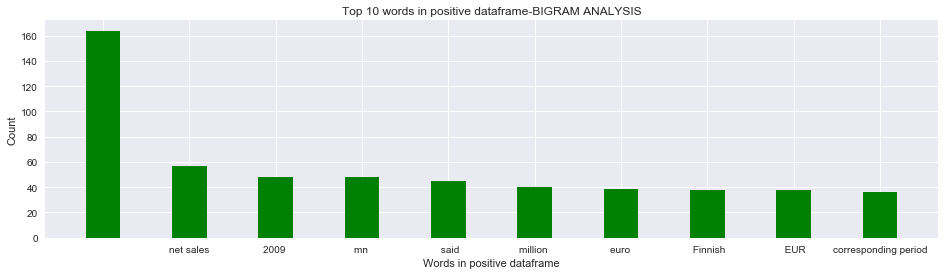

In [52]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

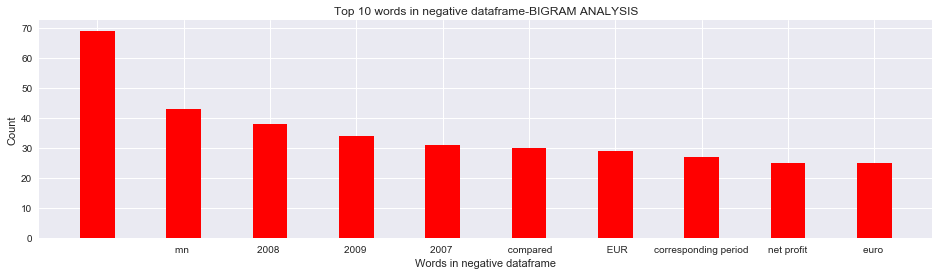

In [53]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

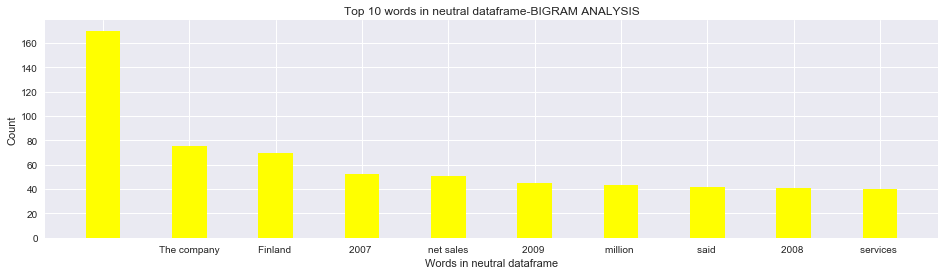

In [54]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

In [55]:
# 8. Creating trigrams:
# Repeat the same steps which we followed to analyze our data using unigrams except that you have to pass 
# parameter 3 while invoking the generate_N_grams() function.You can optionally consider changing the names
# of the data frames, which I have done.

In [56]:
positiveValues3 = defaultdict(int)
negativeValues3 = defaultdict(int)
neutralValues3 = defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes.

In [57]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 1.sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['Finnish', 'telecoms', 'software', 'developer', 'Tecnomen', 'Oyj', 'said', 'December', '5', '', '2006', '', '33', 'mln', '', '25', 'mln', 'euro', '', 'order', 'supply', 'expansion', 'charging', 'messaging', 'systems', 'mobile', 'fixed', 'networks', 'Brasil', 'Telecom', '']
Sentence after removing stopwords: ['The', 'launch', 'plant', 'June', 'went', 'well', '', 'producing', 'advanced', 'fuel', 'couple', 'weeks', '']
Sentence after removing stopwords: ['BasWare', 'CEO', 'Ilkka', 'Sihvo', 'comments', 'conjunction', 'Interim', 'Report', '', '', 'As', 'whole', '', 'BasWare', 'succeeded', 'well', 'second', 'quarter', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'plans', 'expand', 'international', 'market', 'subsidiaries', 'distributors', '2011', 'onwards', '']
Sentence after removing stopwords: ['Outotec', 'said', 'new', 'orders', 'worth', '4929', 'mln', 'eur', 'quarter', '', 'compared', '2404', 'mln', 'eur', 'year', 'earlier', '']
Se

Sentence after removing stopwords: ['Finnish', 'operator', 'Elisa', 'Aker', 'Yards', 'signed', 'longterm', 'service', 'deal', 'Elisa', 'deliver', 'necessary', 'voice', 'data', 'services', 'Aker', 'Yards', 'Finland', '']
Sentence after removing stopwords: ['Aspocomp', 'repaid', 'interest', 'bearing', 'liability', 'Standard', 'Chartered', 'Bank', 'use', 'rest', 'consideration', 'partially', 'repay', 'interest', 'bearing', 'liabilities', 'Finland', 'improve', 'liquidity', '']
Sentence after removing stopwords: ['Last', 'year', '', 'Lemminkainen', 'completed', 'Kouvola', 'Ksupermarket', 'contract', '']
Sentence after removing stopwords: ['The', 'optimization', 'steel', 'components', 'heating', 'process', 'reduce', 'energy', 'consumption', '']
Sentence after removing stopwords: ['According', 'Karhinen', '', 'OPPohjola', 'exciting', 'enterprise', 'cooperation', 'bring', 'huge', 'opportunities', 'customers', 'company', '']
Sentence after removing stopwords: ['', 'I', 'warmly', 'welcome', 'Mic

Sentence after removing stopwords: ['Finnish', 'Okmetic', 'manufactures', 'processes', 'silicon', 'wafers', 'semiconductor', 'sensor', 'industries', 'Norwegian', 'solar', 'wafer', 'company', 'NorSun', 'signed', 'contract', 'Okmetic', 'supply', 'NorSun', 'mono', 'silicon', 'crystals', 'use', 'solar', 'cell', 'manufacturing', '']
Sentence after removing stopwords: ['Singapore', 'May', '2011', '1', 'July', '2010', '', 'Finnish', 'air', 'carrier', 'Finnair', 'Oyj', '', 'HEL', '', 'FIA1S', '', 'said', 'today', 'open', 'daily', 'route', 'Singapore', '30', 'May', '2011', 'part', 'growth', 'strategy', 'Asia', '']
Sentence after removing stopwords: ['In', 'banking', '', 'Sampo', 'A', 'unchanged', '1424', 'eur', 'Nordea', 'rose', '042', 'pct', '951', 'eur', '']
Sentence after removing stopwords: ['Finnish', 'Bore', 'owned', 'Rettig', 'family', 'grown', 'recently', 'acquisition', 'smaller', 'shipping', 'companies', '']
Sentence after removing stopwords: ['Mobile', 'phone', 'sales', 'rose', '25', 

Sentence after removing stopwords: ['However', '', 'Simdax', 'remain', 'available', 'markets', 'already', 'approved', 'marketing', 'authorisations', 'submitted', 'applications', '40', 'countries', '', 'Orion', 'added', '']
Sentence after removing stopwords: ['Dubai', 'Nokia', 'announced', 'launch', '', 'Comes', 'Music', '', '', 'groundbreaking', 'service', 'introduces', 'new', 'way', 'people', 'enjoy', 'music', '']
Sentence after removing stopwords: ['Higher', 'bit', 'rates', 'outgoing', 'traffic', 'improves', 'enduser', 'experience', 'mobile', 'broadband', 'services', 'video', 'conferencing', '', 'file', 'sharing', 'sending', 'emails', 'attachments', '']
Sentence after removing stopwords: ['In', 'release', '', 'Company', 'said', 'Vocollect', 'T2', 'customers', 'North', 'America', 'take', 'advantage', 'Voice', 'Directed', 'Warehousing', 'solution', 'increase', 'warehouse', 'efficiency', 'productivity', 'gains', 'discounted', 'price', '']
Sentence after removing stopwords: ['27', 'Janua

Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Feb', '11', '', '2009', '', 'Finnish', 'management', 'software', 'solutions', 'provider', 'Ixonos', 'Oyj', '', 'HEL', '', 'XNS1V', '', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '35', 'million', '', 'USD', '45', '', '2008', 'EUR', '31', 'million', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'feels', 'leases', 'prime', 'locations', 'due', 'several', 'producing', 'formations', 'immediate', 'area', '']
Sentence after removing stopwords: ['In', '2009', '', 'Fiskars', '', 'cash', 'flow', 'operating', 'activities', 'amounted', 'EUR121m', '', 'EUR97m', 'previous', 'year', '']
Sentence after removing stopwords: ['Nokia', 'bought', 'Chicagobased', 'Navteq', '2008', '', 'acquiring', 'maps', 'database', 'compete', 'Google', 'maps', 'well', 'navigation', 'device', 'companies', 'TomTom', 'NV', 'Garmin', 'Ltd', '']
Sentence after removing stopwords: ['However', '', 'sales', 'volumes', 'food', 'industry', 'exp

Sentence after removing stopwords: ['At', 'first', 'contract', 'envisaged', 'construction', 'three', 'ferryboats', 'option', 'two', 'units', '', 'confirmed', 'total', 'value', '500', 'mln', 'euro', '', '', '6458', 'mln', '', '']
Sentence after removing stopwords: ['In', 'third', 'quarter', '', 'net', 'sales', 'increased', '12', '', 'yearonyear', 'EUR', '1595', 'million', '', '6', '', 'comparable', 'currency', 'rates', 'growth', '']
Sentence after removing stopwords: ['Technopolis', 'Europe', 'leading', 'operator', 'technoparks', '']
Sentence after removing stopwords: ['KESKO', 'FOOD', 'LTD', 'PRESS', 'RELEASE', '04012006', 'AT', '1300', 'Kesko', 'Food', 'Ltd', 'launching', 'major', 'TV', 'campaign', 'recruit', 'many', 'one', 'hundred', 'new', 'Kfood', 'retailers', '']
Sentence after removing stopwords: ['The', 'effect', 'savings', 'noticeable', 'beginning', '2010', '']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '98', 'mn', '', 'compared', 'loss', 'EUR', '127', 'm

Sentence after removing stopwords: ['The', 'investments', 'operational', 'changes', 'enable', 'additional', 'optimisation', 'working', 'hours', 'thereby', 'cost', 'savings', '7', '', '9', '', '']
Sentence after removing stopwords: ['Metso', 'expects', 'net', 'sales', 'increase', '10', '', '2008', '', 'comparable', 'exchange', 'rates', '']
Sentence after removing stopwords: ['Hkan', 'Dahlstr¦m', '', 'head', 'mobility', 'services', 'TeliaSonera', '', 'forecast', 'mobile', 'data', 'volume', 'TeliaSonera', 'network', 'Sweden', 'rise', 'eightfold', '200000', 'TB', '2014', '']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', '2008', 'increase', '510', '', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'intensifying', 'smelter', 'operations', 'increasing', 'annual', 'production', 'capacity', '230000', 'tonnes', 'copper', '']
Sentence after removing stopwords: ['Besides', 'increased', 'share', 'meat', 'various', 'sausages', 'offering', 'number

Sentence after removing stopwords: ['Finnish', 'industrial', 'investor', 'Panostaja', 'Oyj', 'OMX', 'Helsinki', '', 'PNAAS', 'OMX', 'Helsinki', '', 'PNABS', 'said', 'Friday', '11', 'July', 'signed', 'deal', 'acquire', 'entire', 'share', 'capital', 'Kospa', 'Oy', '', 'manufacturer', 'waste', 'disposal', 'equipment', '']
Sentence after removing stopwords: ['TeliaSonera', 'TLSN', 'said', 'offer', 'line', 'strategy', 'increase', 'ownership', 'core', 'business', 'holdings', 'would', 'strengthen', 'Eesti', 'Telekom', 'offering', 'customers', '']
Sentence after removing stopwords: ['This', 'Done', 'Logistics', '', 'largest', 'order', 'Norway', '', 'diversified', 'group', 'said', '']
Sentence after removing stopwords: ['Jarmo', 'Honkamaa', '', 'head', 'oil', 'refining', 'business', 'Neste', 'Oil', '', 'says', 'situation', 'looks', 'promising', 'viewpoint', '']
Sentence after removing stopwords: ['', 'This', 'repeat', 'order', 'follow', 'successfully', 'installed', '159', 'elevators', 'Delhi', 

Sentence after removing stopwords: ['The', 'purpose', 'action', 'ensure', 'company', 'cost', 'effectiveness', 'year', 'near', 'future', '']
Sentence after removing stopwords: ['According', 'company', 'updated', 'strategy', 'years', '20092012', '', 'Basware', 'targets', 'longterm', 'net', 'sales', 'growth', 'range', '20', '', '40', '', 'operating', 'profit', 'margin', '10', '', '20', '', 'net', 'sales', '']
Sentence after removing stopwords: ['', 'By', 'separating', 'side', 'businesses', 'able', 'faster', 'expand', 'develop', 'Tapro', 'retail', 'network', '']
Sentence after removing stopwords: ['', 'After', 'purchase', '', 'Cramo', 'become', 'second', 'largest', 'rental', 'services', 'provider', 'Latvian', 'market', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', '', 'net', 'sales', 'increased', '2', '', 'EUR', '10507', 'mn', 'EUR', '10270', 'mn', 'fourth', 'quarter', '2007', '']
Sentence after removing stopwords: ['OLeary', 'Material', 'Handling', 'Services',

Sentence after removing stopwords: ['Cramo', 'Group', 'financial', 'targets', '20102013', 'sales', 'growth', 'higher', '10', 'percent', 'per', 'year', '', 'return', 'equity', '15', 'percent', '']
Sentence after removing stopwords: ['Kazgiprotsvetmet', 'Outotec', 'Finland', 'signed', 'agreement', 'strategic', 'cooperation', 'marketing', 'providing', 'minerals', 'processing', 'metallurgical', 'plants', 'related', 'services', 'Kazakhstan', 'surrounding', 'countries', '']
Sentence after removing stopwords: ['Net', 'interest', 'income', 'EUR', '393', 'mn', '', 'EUR', '327', 'mn', '']
Sentence after removing stopwords: ['', 'PO', 'Ferries', 'efficient', 'powerful', 'vessel', 'Dover', 'Calais', 'route', '', '', 'head', 'shipbuilder', 'Rauma', 'yard', '', 'Timo', 'Suistio', '', 'said', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Sep', '30', '', '2008', '', 'Finnish', 'security', 'privacy', 'software', 'solutions', 'developer', 'Stonesoft', 'Oyj', 'said', 'today', 'USD',

Sentence after removing stopwords: ['Incap', 'Contract', 'Manufacturing', 'Services', 'Private', 'Limited', 'inked', 'agreements', 'six', 'new', 'customers', 'India', '']
Sentence after removing stopwords: ['Finnish', 'department', 'store', 'chain', 'Stockmann', 'Oyj', 'Abp', 'net', 'profit', 'rose', '398', 'mln', 'euro', '', '', '568', 'mln', '', 'first', 'nine', 'months', '2007', '374', 'mln', 'euro', '', '', '534', 'mln', '', 'period', '2006', '']
Sentence after removing stopwords: ['2010', '16', 'July', '2010', '', 'Finnish', 'steel', 'maker', 'Rautaruukki', 'Oyj', 'HEL', '', 'RTRKS', '', 'Ruukki', '', 'said', 'today', 'turned', 'net', 'profit', 'EUR20m', 'second', 'quarter', '2010', 'net', 'loss', 'EUR94m', 'corresponding', 'period', 'last', 'year', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Oct', '1', '', '2008', '', 'Finnish', 'consulting', 'engineering', 'company', 'Poyry', 'Oyj', '', 'OMX', '', 'POY1V', '', 'said', 'today', 'awarded', 'EUR', '52', 'mil

Sentence after removing stopwords: ['Net', 'sales', 'went', '1', '', 'yearonyear', 'EUR', '29', 'million', '', 'affected', 'business', 'acquisitions', '', 'realized', 'previous', 'financial', 'period', '', 'effect', 'EUR', '51', 'million', 'review', 'period', '']
Sentence after removing stopwords: ['Net', 'sales', 'Finnish', 'food', 'industry', 'company', 'LÆnnen', 'Tehtaat', 'continuing', 'operations', 'increased', '13', '', '2008', 'EUR', '3491', 'mn', 'EUR', '3096', 'mn', '2007', '']
Sentence after removing stopwords: ['The', 'GeoSolutions', 'technology', 'leverage', 'Benefon', 'GPS', 'solutions', 'providing', 'Location', 'Based', 'Search', 'Technology', '', 'Communities', 'Platform', '', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model', '']
Sentence after removing stopwords: ['YIT', 'Construction', 'town', 'RiihimÆki', 'signed', 'lease', 'contract', 'whereby', 'town', 'occupy', 'Travel', 'Centre', 'office', 'facilities', '']
Sentence after r

Sentence after removing stopwords: ['Stora', 'Enso', 'R', 'shares', 'rose', '120', 'pct', '1184', 'eur', '', 'UPMKymmene', 'also', 'dragged', 'higher', '', 'rising', '168', 'pct', '1756', 'eur', 'MReal', 'B', 'added', '238', 'pct', '430', 'eur', '']
Sentence after removing stopwords: ['Finnish', 'plumbing', 'heating', 'systems', 'supplier', 'Uponor', 'Corporation', '', 'OMX', 'Helsinki', '', 'UNR1V', '', 'said', 'Tuesday', '', '12', 'August', '', 'board', 'directors', 'authorised', 'management', 'proceed', 'companywide', 'cost', 'reduction', 'program', '']
Sentence after removing stopwords: ['Stockmann', 'Swedish', 'sector', 'company', 'AB', 'Lindex', 'entered', 'agreement', 'September', '30', '', '2007', '', 'whereby', 'Stockmann', '', 'whollyowned', 'subsidiary', '', 'make', 'public', 'tender', 'offer', 'Lindex', 'issued', 'shares', '']
Sentence after removing stopwords: ['Sales', 'improved', 'SEK', '1553', 'mn', '', 'compared', 'SEK', '1408', 'mn', '']
Sentence after removing stopwo

Sentence after removing stopwords: ['21', 'December', '2010', '', 'Finnish', 'industrial', 'machinery', 'company', 'Wartsila', 'Oyj', 'Abp', 'HEL', '', 'WRT1V', 'said', 'yesterday', 'order', 'design', 'liquefied', 'natural', 'gas', 'LNG', 'powered', 'platform', 'supply', 'vessel', 'PSV', 'Norwegian', 'oil', 'service', 'provider', 'Eidesvik', 'Offshore', 'ASA', 'OSL', '', 'EIOF', '']
Sentence after removing stopwords: ['Sanoma', 'Magazines', 'Finland', 'net', 'sales', 'grew', 'EUR', '1401', 'mn', 'EUR', '1318', 'mn', '']
Sentence after removing stopwords: ['We', 'glad', 'long', 'cooperation', 'SODRA', 'continues', '', '', 'comments', 'StigGoran', 'Sandberg', '', 'Affecto', 'Area', 'Manager', 'Baltic', 'operations', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', 'net', 'profit', 'rose', '261', 'mln', 'euro', '', '', '359', 'mln', '', 'first', 'quarter', '2007', '53', 'mln', 'euro', '', '', '73', 'mln', '', 'period', '2006', '']
Sen

Sentence after removing stopwords: ['The', 'company', '', 'makes', 'garden', 'tools', '', 'scissors', 'consumer', 'goods', '', 'said', 'earnings', 'boosted', '69', 'mln', 'eur', 'income', 'received', '167', 'pct', 'shareholding', 'Finnish', 'engineering', 'group', 'Wartsila', '']
Sentence after removing stopwords: ['Finnish', 'energy', 'company', 'Fortum', 'Oyj', 'said', 'November', '13', '', '2007', 'granted', 'environmental', 'permit', 'build', 'biofuelfired', 'combined', 'heat', 'power', 'CHP', 'plant', 'Vartan', 'harbor', 'eastern', 'Stockholm', '']
Sentence after removing stopwords: ['Finnish', 'construction', 'group', 'Lemminkainen', 'Oyj', 'HEL', '', 'LEM1S', 'said', 'today', 'contract', 'provide', 'technical', 'services', 'Nevsky', 'Centre', 'shopping', 'mall', 'opened', 'November', 'St', 'Petersburg', '', 'Russia', '']
Sentence after removing stopwords: ['The', 'rationalization', 'operations', 'seeks', 'achieve', 'EUR', '1', 'million', 'yearly', 'savings', 'second', 'quarter',

Sentence after removing stopwords: ['Net', 'sales', 'revenue', 'per', 'passenger', 'expected', 'increase', '']
Sentence after removing stopwords: ['Finnish', 'retailer', 'Stockmann', 'approval', 'board', 'Swedish', 'rival', 'Lindex', 'public', 'tender', 'offer', 'aim', 'expanding', 'companies', '', 'presence', 'Russia', 'CEE', 'countries', '', 'Stockmann', 'said', 'Monday', '']
Sentence after removing stopwords: ['15', 'December', '2010', '', 'FinnishGerman', 'telecoms', 'equipment', 'maker', 'Nokia', 'Siemens', 'Networks', 'said', 'today', 'contract', 'upgrade', 'radio', 'network', 'homebased', 'telecommunications', 'company', 'Elisa', 'Oyj', 'HEL', '', 'ELI1V', '']
Sentence after removing stopwords: ['Through', 'acquisition', 'Solteq', 'expand', 'solutions', 'offering', 'Microsoft', 'Dynamics', 'business', 'software', 'products', '']
Sentence after removing stopwords: ['One', 'colleagues', 'summed', 'E7', 'quite', 'aptly', 'remarked', '', '', 'Fantastic', 'hardware', '']
Sentence aft

In [58]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 2.sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['Orion', 'net', 'profit', 'third', 'quarter', '2007', 'decreased', '365', 'mln', 'euro', '', '', '521', 'mln', '', '403', 'mln', 'euro', '', '', '575', 'mln', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', '', 'net', 'sales', 'decreased', 'EUR', '1214', 'mn', 'EUR', '1655', 'mn', 'fourth', 'quarter', '2007', '']
Sentence after removing stopwords: ['A', 'high', 'court', 'Finland', 'fined', 'seven', 'local', 'asphalt', 'companies', '', '', 'lion', '', '', '117', 'million', '', 'operating', 'cartel', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totaled', 'EUR', '67', 'mn', '', 'EUR', '72', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['UPMKymmene', 'Corp', '', 'world', 'largest', 'maker', 'magazine', 'paper', '', 'Tuesday', 'reported', '19percent', 'profit', 'drop', 'lower', 'paper', 'prices', '', 'higher', 'costs', 'strong', 'euro', 'hurt', 'revenue

Sentence after removing stopwords: ['The', 'one', 'dark', 'spot', 'horizon', '', 'however', '', 'company', 'performance', 'Finnish', 'bottled', 'water', 'market', '']
Sentence after removing stopwords: ['Sales', 'Tiimari', 'business', 'went', '8', '', 'EUR', '118', 'million', '', 'Gallerix', 'stores', 'saw', '29', '', 'growth', 'EUR', '2', 'million', '']
Sentence after removing stopwords: ['Pretax', 'loss', 'totaled', 'EUR', '117mn', 'compared', 'loss', 'EUR', '65mn', 'corresponding', 'period', '']
Sentence after removing stopwords: ['25', 'March', '2011', '', 'Finnish', 'electronics', 'contract', 'manufacturer', 'Scanfil', 'Oyj', 'HEL', '', 'SCF1V', 'said', 'today', 'plan', 'merge', 'wholly', 'owned', 'Scanfil', 'EMS', 'Group', 'OjalaYhtyma', 'Oy', 'hit', 'snag', 'shareholders', 'domestic', 'rival', 'rejected', 'deal', '']
Sentence after removing stopwords: ['Operating', 'profit', 'fell', 'EUR', '354', 'mn', 'EUR', '688', 'mn', '2007', '', 'including', 'vessel', 'sales', 'gain', 'EUR'

Sentence after removing stopwords: ['The', 'steelmaker', 'said', 'drop', 'profit', 'explained', 'continuing', 'economic', 'uncertainty', '', 'mixed', 'current', 'drought', 'bank', 'lending', '', 'resulting', 'decline', 'demand', 'products', 'customers', 'find', 'increasingly', 'difficult', 'fund', 'operations', '']
Sentence after removing stopwords: ['Profit', 'period', 'totalled', 'EUR', '08', 'mn', '', 'EUR', '11', 'mn', 'corresponding', 'period', '2008', '']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'totaled', 'EUR', '54', 'mn', 'compared', 'EUR', '55', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Applying', 'summer', 'work', 'seen', 'laborious', 'stressful', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'comparable', 'operating', 'profit', 'JanuaryJune', 'period', 'fell', 'short', 'last', 'year', 'corresponding', 'performance', '']
Sentence after removing stopwords: ['Agr

Sentence after removing stopwords: ['Finnish', 'financial', 'software', 'solutions', 'developer', 'BasWare', 'Oyj', 'said', 'net', 'profit', 'fell', '884000', 'euro', '', '', '12', 'mln', '', 'first', 'quarter', '2007', '20', 'mln', 'euro', '', '', '27', 'mln', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['Changes', 'market', 'situation', 'tougher', 'price', 'competition', 'substantially', 'reduced', 'demand', 'bread', 'packaging', 'manufactured', 'Kauhava', 'plant', '', 'according', 'company', '']
Sentence after removing stopwords: ['Finnish', 'industrial', 'group', 'Ruukki', 'Group', 'brought', 'counter', 'action', 'Finnish', 'metal', 'company', 'Rautaruukki', 'dispute', 'concerning', 'names', 'companies', '']
Sentence after removing stopwords: ['However', '', 'net', 'sales', 'declined', 'EUR', '8036', 'million', 'EUR', '12', 'billion', '']
Sentence after removing stopwords: ['The', 'low', 'capacity', 'utilisation', 'rate', 'steel', 'production', 'considerably', 'in

Sentence after removing stopwords: ['In', 'Baltic', 'states', 'company', 'reports', 'net', 'sales', 'EUR', '119', 'mn', '', 'EUR', '142', 'mn', '', 'operative', 'EBIT', 'EUR', '22', 'mn', '', 'EUR', '17', 'mn', '']
Sentence after removing stopwords: ['The', 'first', 'ship', 'delayed', 'estimated', 'completed', 'spring', '2010', '']
Sentence after removing stopwords: ['The', 'total', 'number', 'filling', 'stations', 'decrease', 'recently', '']
Sentence after removing stopwords: ['According', 'Finnish', 'petrol', 'station', 'chain', 'St1', 'managing', 'director', 'Kim', 'Wiio', '', 'company', 'forced', 'make', 'purchases', 'rising', 'prices', 'first', 'half', '2008', '', 'consumer', 'prices', 'going', 'almost', 'daily', 'due', 'competition', '']
Sentence after removing stopwords: ['Revenue', 'quarter', 'totaled', '274', 'billion', '', '2', 'percent', '281', 'billion', 'fourth', 'quarter', '2008', '']
Sentence after removing stopwords: ['Vaisala', 'net', 'profit', 'third', 'quarter', '200

Sentence after removing stopwords: ['The', 'SeaWind', 'en', 'route', 'Finnish', 'port', 'Turku', 'Stockholm', 'got', 'stuck', 'ice', 'already', 'around', '4', 'pm', 'Wednesday', 'Regal', 'Star', 'journey', 'Swedish', 'port', 'Kapellskar', 'Paldiski', 'northwestern', 'Estonia', 'cut', 'short', '2', 'Thursday', '']
Sentence after removing stopwords: ['YIT', 'Baltic', 'sales', 'first', 'three', 'quarters', '2008', 'totaled', '1062', 'million', 'euros', '', 'representing', 'drop', '29', 'percent', 'year', 'year', '']
Sentence after removing stopwords: ['', 'Small', 'firms', 'suffering', 'moment', 'likely', 'money', 'trouble', '', '', 'added', '']
Sentence after removing stopwords: ['Loss', 'period', 'totalled', 'EUR', '156', 'mn', 'compared', 'profit', 'EUR', '63', 'mn', '2008', '']
Sentence after removing stopwords: ['Hobby', 'Hall', 'sales', 'decrease', '26', 'pct', 'due', 'implementing', 'new', 'information', 'system', 'involved', 'changing', 'principal', 'posting', 'sales', '']
Sentenc

Sentence after removing stopwords: ['Exports', 'goods', 'fell', '59', '', '', 'imports', '167', '', '']
Sentence after removing stopwords: ['The', 'acquisition', 'landsbanken', 'Sverige', '2009', 'burdened', 'performance', 'EUR', '30', 'mn', '']
Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', '2005', 'decreased', 'EUR1', '87', 'EUR1', '89', '2003', '']
Sentence after removing stopwords: ['TeliaSonera', 'underlying', 'results', 'however', 'included', '457', 'mln', 'skr', 'positive', 'oneoffs', '', 'hence', 'adjusted', 'underlying', 'EBITDA', 'actually', 'amounts', '7309', 'bln', 'skr', '', 'clearly', 'expectations', '', 'analysts', 'said', '']
Sentence after removing stopwords: ['The', 'terms', 'aforementioned', 'funding', 'considerably', 'Bank', 'current', 'CDS', 'levels', 'market', 'maturity', 'ranging', '1', '75', 'years', '']
Sentence after removing stopwords: ['The', 'contracts', 'employees', '', '96', 'bluecollar', 'workers', '', 'ended', 'March', 'A

In [59]:
#get the count of every word in both the columns of df_train and df_test dataframes where 
# 3.sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['After', 'acquisition', '', 'Basware', 'preliminary', 'pro', 'forma', 'net', 'sales', '2005', 'amount', 'EUR', '526', 'mn', '', 'preliminary', 'pro', 'forma', 'operating', 'profit', 'amounts', 'EUR', '71', 'mn', '']
Sentence after removing stopwords: ['The', 'Group', '', 'net', 'sales', 'EUR', '235', 'million', '2009', '', 'employs', '2', '000', 'people', '33', 'countries', '']
Sentence after removing stopwords: ['CHS', 'Expo', 'Freight', 'major', 'Finnish', 'fair', '', 'exhibition', 'culture', 'logistics', 'company', 'provides', 'logistics', 'services', 'various', 'events', 'land', '', 'air', 'sea', '']
Sentence after removing stopwords: ['The', 'figure', 'include', 'food', 'exports', 'Finland', '']
Sentence after removing stopwords: ['Cardona', 'slowed', 'vehicle', '', 'turned', 'around', 'returned', 'intersection', '', 'called', '911', '']
Sentence after removing stopwords: ['cents', 'The', 'profile', 'contains', 'business', 'operations', '', 'com

Sentence after removing stopwords: ['Why', 'put', 'costly', 'cell', 'phone', 'towers', 'thinly', 'populated', 'areas', 'balloons', 'would', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'deal', 'USD', '29mn', '']
Sentence after removing stopwords: ['cents', 'Recognize', 'potential', 'partnerships', 'suppliers', '']
Sentence after removing stopwords: ['All', 'charges', 'dismissed', '']
Sentence after removing stopwords: ['Net', 'sales', 'SataFlexo', 'Group', 'came', 'EUR4', '3', '2007', '', 'group', 'companies', 'employed', 'total', '40', 'people', '']
Sentence after removing stopwords: ['The', 'first', 'installment', 'Cinema', 'Series', 'concludes', 'profile', 'Finnish', 'inventor', 'Olavi', 'Linden', '', 'whose', 'personal', 'artistic', 'journey', 'work', 'Fiskars', 'led', 'dozens', 'design', 'awards', '']
Sentence after removing stopwords: ['The', 'acquired', 'plant', 'annual', 'capacity', '300000', 'tonnes', 'production', 'sold', 'domestic', 'customers', '']
Sente

Sentence after removing stopwords: ['Citigroup', '', 'Inc', 'NYSE', '', 'C', '', 'Deutsche', 'Bank', 'NYSE', '', 'DB', 'Pohjola', 'Bank', 'lead', 'managers', 'sale', '']
Sentence after removing stopwords: ['A', 'light', '', 'bright', 'pretty', 'addition', 'life', '', 'also', 'keep', 'pennies', 'bank', 'account', '']
Sentence after removing stopwords: ['No', 'financial', 'details', 'deployment', 'disclosed', '']
Sentence after removing stopwords: ['Finnlines', 'said', 'deal', 'part', 'strategy', 'focus', 'core', 'businesses', '']
Sentence after removing stopwords: ['Previously', '', 'company', 'expected', '2008', 'financial', 'performance', 'remain', 'level', '2008', '']
Sentence after removing stopwords: ['The', 'dividends', 'payable', 'annually', 'shall', 'deducted', 'share', 'subscription', 'price', '']
Sentence after removing stopwords: ['', 'My', 'wife', 'looking', 'forward', 'getting', 'paycheck', '', '', 'quipped', 'recently', 'sixknot', 'current', 'swirled', 'around', 'anchored'

Sentence after removing stopwords: ['ABOUT', 'MIDNIGHTTRADER', '', 'MidnightTrader', 'premier', 'source', 'extendedhours', 'US', 'equity', 'trading', 'analysis', '', 'news', 'forecasting', 'retail', 'institutional', 'investment', 'community', '']
Sentence after removing stopwords: ['Teleste', 'set', '1954', 'divided', 'Broadband', 'Cable', 'Networks', 'Video', 'Networks', 'business', 'areas', '']
Sentence after removing stopwords: ['With', 'US', 'Federal', 'Government', 'putting', 'stake', 'ground', '', 'vendors', '', 'customers', '', 'focused', 'meeting', 'deadline', '']
Sentence after removing stopwords: ['Aker', 'Yards', 'Finland', 'begin', 'using', 'Chinese', 'subcontractors', 'Finnish', 'shipyards', '']
Sentence after removing stopwords: ['In', '2006', '', 'TeliaSonera', 'net', 'sales', 'SEK', '91', 'bn', '', 'EBITDA', 'SEK', '32266', 'bn', '', 'net', 'income', 'SEK', '1928', 'bn', '']
Sentence after removing stopwords: ['The', 'financial', 'details', 'transaction', 'disclosed', '

Sentence after removing stopwords: ['Auburn', 'sales', '2007', 'CAD', '41', 'million', '', 'approximately', 'EUR', '27', 'million', '', '', 'company', 'employs', '150', 'people', '']
Sentence after removing stopwords: ['Finlandbased', 'international', 'machinery', 'rental', 'company', 'Ramirent', 'Plc', '', 'OMX', 'Helsinki', '', 'RMR1V', '', 'reported', 'Friday', '', '15', 'August', '', 'operating', 'profit', 'EUR65', '0', 'net', 'sales', 'EUR342', '9', 'period', 'JanuaryJune', '2008', '']
Sentence after removing stopwords: ['In', 'addition', 'presentations', 'held', 'President', '', 'CEO', 'Kai', 'Telanne', 'CFO', 'Tuomas', 'Itkonen', '', 'participants', 'opportunity', 'discuss', 'members', 'company', 'management', '']
Sentence after removing stopwords: ['Previously', '', 'Vaahto', 'Pulp', 'supplied', 'headboxes', 'rectifier', 'roll', 'dilution', 'control', 'technology', 'Stora', 'Enso', 'mill', 'Imatra', '', 'eastern', 'Finland', '']
Sentence after removing stopwords: ['The', 'metho

Sentence after removing stopwords: ['TyrvÆinen', 'opinion', 'airline', 'repeating', 'time', 'already', '', 'however', '']
Sentence after removing stopwords: ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords: ['The', 'ore', 'body', 'sufficient', 'support', 'anticipated', 'production', 'least', '46', 'years', '']
Sentence after removing stopwords: ['The', 'Bank', 'also', 'examining', 'benefits', 'transferring', 'Swedish', 'business', 'operate', 'branch', 'office', 'operations', 'would', 'governed', 'Finland', 'laws', '']
Sentence after removing stopwords: ['Risto', 'Jalo', '', 'chief', 'executive', 'Dormus', 'Print', 'also', 'owner', 'remainder', 'company', '', 'keep', 'position', 'acquisition', '']
Sentence after rem

Sentence after removing stopwords: ['Vaisala', 'Oyj', 'Stock', 'exchange', 'release', '26032010', 'klo', '0900', '1', '', '1', '', 'The', 'Annual', 'General', 'Meeting', 'Vaisala', 'Oyj', 'decided', 'March', '25', '', '2010', 'approve', 'Company', 'annual', 'accounts', '2009', '']
Sentence after removing stopwords: ['All', 'YIT', 'Capital', 'Markets', 'Day', 'materials', 'available', 'company', 'Internet', 'site', 'wwwyitgroupcominvestors', '1030', 'September', '26', '']
Sentence after removing stopwords: ['When', 'dialing', '', 'participants', 'quote', '877417', 'conference', 'ID', '']
Sentence after removing stopwords: ['Finnish', 'Stockmann', 'Group', 'mail', 'order', 'unit', 'Hobby', 'Hall', 'launched', 'trial', 'marketing', 'campaign', 'Russia', '']
Sentence after removing stopwords: ['Technopolis', 'set', 'aside', 'plot', 'land', 'measuring', '46', 'hectares', 'build', 'park', '', 'Mikkonen', 'said', '']
Sentence after removing stopwords: ['YIT', 'Kausta', 'build', 'commercial', 

Sentence after removing stopwords: ['pct', 'lower', '444210', '']
Sentence after removing stopwords: ['It', '30', 'offices', 'worldwide', '90', 'pct', 'net', 'sales', 'generated', 'outside', 'Finland', '']
Sentence after removing stopwords: ['Germany', 'innovational', 'centers', 'united', 'focusing', 'companies', '', 'aim', 'use', 'technologies', 'development', 'new', 'kinds', 'activity', '', 'supporting', 'beginner', 'companies', 'entire', 'spectrum', 'services', '']
Sentence after removing stopwords: ['Maximum', 'amount', 'terminations', 'Finland', '40', 'employees', '', 'company', 'added', '']
Sentence after removing stopwords: ['', 'Our', 'approach', 'much', 'use', 'raw', 'materials', 'produced', 'line', 'principles', 'sustainable', 'development', '']
Sentence after removing stopwords: ['Kaukopartio', 'Oy', 'acquired', 'specialized', 'knowledge', 'Far', 'Eastern', 'operations', '', 'industrial', 'sourcing', 'services', 'core', 'competence', '']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['In', 'addition', '', 'MIDs', 'always', 'online', 'enable', 'full', 'Internet', 'browsing', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'said', 'DeLight', 'suitable', 'wide', 'range', 'applications', 'including', 'food', '', 'cosmetics', '', 'home', 'decoration', 'leisure', 'products', '']
Sentence after removing stopwords: ['In', '2007', 'Etteplan', 'reported', 'turnover', 'EUR125', '2']
Sentence after removing stopwords: ['According', 'LÆnnen', 'Tehtaat', 'CEO', 'Matti', 'Karppinen', '', 'company', 'aims', 'deliver', 'fish', 'products', 'customers', 'day', 'earlier', 'currently', '']
Sentence after removing stopwords: ['Under', 'terms', 'agreement', '', 'Bunge', 'acquire', 'Raisio', 'Keiju', '', 'Makuisa', 'Pyszny', 'Duet', 'brands', 'manufacturing', 'plants', 'Finland', 'Poland', '']
Sentence after removing stopwords: ['The', 'authorization', 'force', 'period', '18', 'months', 'resolution', 'General', 'Meeting', '']
Sentence after rem

Sentence after removing stopwords: ['BasWare', 'Invoice', 'Processing', '', 'BasWare', 'Contract', 'Matching', '', 'BasWare', 'Order', 'Matching', 'BasWare', 'KPI', 'Reporting', 'Tool', 'part', 'BasWare', 'Enterprise', 'Purchase', 'Pay', 'product', 'suite', '']
Sentence after removing stopwords: ['The', 'duration', 'contract', '37', 'months', '']
Sentence after removing stopwords: ['To', 'number', 'one', 'means', 'creating', 'added', 'value', 'stakeholders', 'everything', '']
Sentence after removing stopwords: ['And', 'exactly', 'happened', 'recent', 'weekday', 'East', 'Haven', 'baker', 'brought', 'remind', 'residents', 'Easter', 'tradition', 'making', 'wheat', 'rice', 'pies', '']
Sentence after removing stopwords: ['VNH', 'generates', 'annual', 'net', 'sales', '5', 'mln', 'eur', 'employs', '21', 'people', '']
Sentence after removing stopwords: ['The', 'third', 'quarter', 'result', 'also', 'includes', '400000', 'euro', '', '', '575000', '', 'provision', 'downsizing', 'lure', 'manufactu

Sentence after removing stopwords: ['', 'That', 'high', 'figure', 'European', 'scale', '', '', 'Noop', 'said', '', 'recalling', 'however', 'also', 'includes', 'beer', 'bought', 'Finnish', 'tourists', '']
Sentence after removing stopwords: ['Kesko', 'wwwkeskofi', 'Finnish', 'retail', 'specialist', 'whose', 'stores', 'offer', 'quality', 'daily', 'lives', 'consumers', 'valued', 'products', 'services', 'competitive', 'prices', '']
Sentence after removing stopwords: ['The', 'Finnish', 'paints', 'company', 'acquired', 'remaining', '49', 'pct', 'Ukraine', 'LGU', 'undisclosed', 'sum', '']
Sentence after removing stopwords: ['Delhaize', 'Le', 'Lion', 'selected', 'Aldata', 'GOLD', 'Vocal', 'PDA', 'solution', 'Motorola', 'WT4090', 'PDA', 'terminal', '']
Sentence after removing stopwords: ['The', 'maximum', 'amount', 'capital', 'loan', 'EUR30m', 'minimum', 'subscription', '', 'EUR10', '000', '']
Sentence after removing stopwords: ['The', 'wireless', 'industry', 'bracing', 'iPhone', '', 'launch', '

Sentence after removing stopwords: ['In', '2008', '', 'generated', 'net', 'sales', 'EUR', '93', 'million', 'USD', '131', '']
Sentence after removing stopwords: ['Capitex', 'Kalmar', 'continue', 'responsible', 'maintenance', 'technical', 'development', 'services', '']
Sentence after removing stopwords: ['The', 'Group', 'brand', 'portfolio', 'includes', 'leading', 'brand', 'industry', '', 'Rapala', '', 'global', 'brands', 'like', 'VMC', '', 'Storm', '', 'Blue', 'Fox', '', 'Luhr', 'Jensen', '', 'Williamson', '', 'Marttiini', 'Sufix', '']
Sentence after removing stopwords: ['Through', 'Nordic', 'Exchange', '', 'OMX', 'offers', 'access', 'approximately', '80', 'percent', 'Nordic', 'Baltic', 'securities', 'market', '']
Sentence after removing stopwords: ['The', 'vessels', 'also', 'environmentally', 'friendly', '', 'fast', '', 'modern', 'conveniences', '']
Sentence after removing stopwords: ['The', 'floor', 'area', 'Yliopistonrinne', 'project', '7900', 'sq', 'building', 'gross', 'area', 'tota

Sentence after removing stopwords: ['According', 'CEO', 'Hannu', 'SyrjÆnen', '', 'new', 'common', 'name', 'visual', 'identity', 'required', 'group', 'grown', 'internationalised', '']
Sentence after removing stopwords: ['The', 'total', 'scholarship', 'amount', '40000', 'euros', 'recipients', 'chosen', 'recommendation', 'fine', 'arts', 'universities', 'sports', 'associations', '']
Sentence after removing stopwords: ['The', 'joint', 'venture', 'planning', 'quick', 'timetable', 'negotiating', 'lease', 'potential', 'wind', 'farm', 'areas', 'charting', 'feasibility', 'wind', 'farms', '']
Sentence after removing stopwords: ['The', 'mall', 'part', 'Baltic', 'Pearl', 'development', 'project', 'city', 'St', 'Petersburg', '', 'Baltic', 'Pearl', 'CJSC', '', 'subsidiary', 'Shanghai', 'Foreign', 'Joint', 'Investment', 'Company', '', 'developing', 'homes', '35000', 'people', '']
Sentence after removing stopwords: ['The', 'bond', 'value', 'EUR150m', 'maturity', '4', 'years', '']
Sentence after removin

Sentence after removing stopwords: ['Each', 'year', 'dividend', 'deducted', 'subscription', 'price', '']
Sentence after removing stopwords: ['Talvivaara', 'listed', 'London', 'Stock', 'Exchange', 'Main', 'Market', 'NASDAQ', 'OMX', 'Helsinki', 'included', 'FTSE', '250', 'Index', '']
Sentence after removing stopwords: ['The', 'total', 'investment', '2006', '2007', 'expected', 'amount', 'EUR75m', '']
Sentence after removing stopwords: ['Its', 'annual', 'capacity', '10000', 'MW', '']
Sentence after removing stopwords: ['Componenta', 'production', 'lines', 'similarsized', 'products', 'Karkkila', 'Finland', '', 'Weert', 'Netherlands', 'Orhangazi', 'Turkey', '', 'combined', 'output', 'approximately', '100000', 'tonnes', 'net', 'sales', 'EUR', '135', 'million', '2007', '']
Sentence after removing stopwords: ['Panostaja', 'Oyj', 'Board', 'also', 'decided', 'organisational', 'meeting', 'held', 'upon', 'completion', 'AGM', 'implement', 'AGM', 'decision', 'concerning', 'Board', 'member', 'fees', '

Sentence after removing stopwords: ['The', 'adjustments', 'concern', 'staff', 'Specialty', 'Papers', 'Fiber', 'Composites', 'segments', '']
Sentence after removing stopwords: ['Our', 'solutions', 'industryindependent', 'supporting', 'multilingual', 'currency', 'needs', '', 'modular', 'applicable', 'companies', 'sizes', '', '', 'CEO', 'Ilkka', 'Sihvo', 'said', '']
Sentence after removing stopwords: ['It', 'sold', 'one', 'half', 'business', 'operations', 'enter', 'Helsinki', 'Stock', 'Exchange', 'via', 'back', 'door', 'innovative', 'buyout', 'arrangement', 'Kasola', '']
Sentence after removing stopwords: ['LT', 'also', 'acquired', '50', 'pct', 'stake', 'local', 'sector', 'company', 'Salvor', 'Oy', 'beginning', 'September', '2007', '']
Sentence after removing stopwords: ['This', 'rating', 'AM', 'Best', 'highest', 'among', 'CIS', 'countries', '', 'Central', 'Eastern', 'Europe', '']
Sentence after removing stopwords: ['POYRY', 'PLC', 'Additional', 'information', '', 'Heikki', 'Malinen', '',

Sentence after removing stopwords: ['The', 'company', 'pledged', 'new', 'software', 'would', 'render', 'emails', 'documents', 'much', 'appear', 'desktop', 'computers', '']
Sentence after removing stopwords: ['The', 'turbines', 'expected', 'launched', 'end', '2012', '']
Sentence after removing stopwords: ['The', 'business', 'divested', 'generates', 'consolidated', 'net', 'sales', 'EUR', '60', 'million', 'annually', 'currently', '640', 'employees', '']
Sentence after removing stopwords: ['The', 'company', '', 'EUR2', '8', 'bn', 'assets', '', 'counts', 'among', 'five', 'largest', 'shareholders', 'Finnish', 'insurers', 'Ilmarinen', '434', '', 'Varma', '070', '', '', 'well', 'Finnish', 'state', 'pension', 'fund', 'VER', '061', '', '']
Sentence after removing stopwords: ['CapMan', '', 'Stockholmheadquartered', 'private', 'equity', 'firm', '', 'held', 'first', 'close', 'second', 'private', 'equity', 'real', 'estate', 'fund', 'continues', 'push', 'property', 'sector', '']
Sentence after removi

Sentence after removing stopwords: ['According', '', 'construction', 'work', 'start', 'spring', '2007', '', 'facility', 'commissioned', 'spring', '2008', '']
Sentence after removing stopwords: ['On', 'following', 'workday', 'customers', 'check', 'home', 'computers', 'purchases', 'divided', 'different', 'ingredient', 'groups', '', 'much', 'energy', 'various', 'products', 'contain', 'nutritional', 'content', 'purchases', '']
Sentence after removing stopwords: ['The', 'name', 'newspaper', 'publishing', 'printing', 'division', 'Sanoma', 'changed', 'Sanoma', 'News', '']
Sentence after removing stopwords: ['Metso', 'Oyj', 'said', 'sold', 'spreader', 'roll', 'manufacturing', 'business', 'related', 'assets', 'town', 'Nokia', '', 'southern', 'Finland', '', 'group', 'Finnish', 'investors', '', 'operate', 'business', 'name', 'Finbow', 'Oy', '']
Sentence after removing stopwords: ['The', 'Moscow', 'Metro', '', 'wwwmosmetroru', '', 'first', 'metro', 'system', 'Europe', 'implement', 'smart', 'cards'

Sentence after removing stopwords: ['The', 'closing', 'transaction', 'scheduled', 'take', 'place', 'January', '10', '', '2008', '']
Sentence after removing stopwords: ['The', 'agreement', 'JM', 'one', 'series', 'contracts', 'TeliaSonera', 'signed', 'recent', 'months', 'residential', 'construction', 'real', 'estate', 'management', 'companies', 'Sweden', '']
Sentence after removing stopwords: ['After', 'nonrecurring', 'items', 'EUR', '177mn', '', 'profit', 'amounted', 'EUR', '20mn', '']
Sentence after removing stopwords: ['3G', 'data', 'subscribers', 'also', 'helping', 'maintain', 'growth', 'levels', '', 'since', 'dataonly', 'subscriptions', 'push', 'multiple', 'SIM', 'ownership', '']
Sentence after removing stopwords: ['', 'We', 'could', '']
Sentence after removing stopwords: ['A', 'broad', 'range', 'connectivity', 'options', 'including', '3G', '', 'HSPA', 'WiFi', 'gives', 'consumers', 'high', 'speed', 'access', 'Internet', '']
Sentence after removing stopwords: ['The', 'company', 'hope

Sentence after removing stopwords: ['Basware', 'Business', 'Transactions', 'Service', 'enables', 'customer', 'receive', 'send', 'invoices', 'electronic', 'format', '']
Sentence after removing stopwords: ['Information', 'system', 'supplier', 'Sentera', '', '2451', 'pct', '', 'next', 'heavily', 'traded', 'share', 'SysOpen', 'Digia', '', 'software', 'house', '', 'acquired', '774', 'pct', 'company', 'morning', '33', 'mln', 'eur', '']
Sentence after removing stopwords: ['The', 'statutory', 'negotiations', 'headquarters', 'part', 'decrease', '']
Sentence after removing stopwords: ['In', '2006', 'company', 'net', 'sales', 'amounted', 'approximately', 'EUR259m', '8000', 'employees', '']
Sentence after removing stopwords: ['Based', 'negotiations', 'personnel', '', '20', '', 'indicated', 'willingness', 'move', 'new', 'location', '']
Sentence after removing stopwords: ['The', 'interim', 'report', 'first', 'quarter', 'published', 'May', '8', '', '2009', '']
Sentence after removing stopwords: ['The

Sentence after removing stopwords: ['In', 'return', 'New', 'Yorkbased', 'private', 'equity', 'firm', 'receive', '51', '', 'stake', 'Latvian', 'IT', 'telecom', 'group', '']
Sentence after removing stopwords: ['Bluewin', 'Security', 'available', 'monthly', 'subscription', '']
Sentence after removing stopwords: ['Simultaneously', '', 'responsibility', 'area', 'extended', 'legal', 'affairs', 'cover', 'also', 'mergers', 'acquisitions', '']
Sentence after removing stopwords: ['The', 'estimated', 'turnover', 'new', 'company', 'LVL', '25', 'million', 'EEK', '40', 'million', '']
Sentence after removing stopwords: ['The', 'Insolvency', 'Act', 'regulates', 'amount', 'debt', 'borrowers', 'permitted', 'write', '']
Sentence after removing stopwords: ['Elisa', 'expand', 'use', 'technology', 'provided', 'pilot', 'proves', 'successful', '']
Sentence after removing stopwords: ['The', 'Finnish', 'company', 'building', '800000', 'mtyear', 'biodiesel', 'plant', 'Singapore', '']
Sentence after removing stop

Sentence after removing stopwords: ['A', 'total', 'EUR73', '7', 'provided', 'secured', 'senior', 'threeyear', 'debt', 'syndicate', '', 'involving', 'Pohjola', 'Bank', 'HEL', '', 'POH1S', '', 'Finnish', 'arm', 'Nordea', 'Bank', 'AB', 'STO', '', 'NDA', '', 'Sampo', 'Bank', 'HEL', '', 'SAMAS', '']
Sentence after removing stopwords: ['already', 'good', 'position', 'technical', 'building', 'services', 'market', 'Ostrobothnia', '']
Sentence after removing stopwords: ['He', 'joined', 'Rautakirja', '1997', 'lead', 'one', 'four', 'business', 'areas', 'took', 'position', 'President', 'CEO', '2001', '']
Sentence after removing stopwords: ['The', 'share', 'capital', 'Basware', 'Corporation', '11720829', '']
Sentence after removing stopwords: ['The', 'company', 'try', 'adapt', 'operations', 'temporary', 'layoffs', 'different', 'duration', '', 'working', 'hour', 'arrangements', '', 'training', 'development', 'efforts', '']
Sentence after removing stopwords: ['Technopolis', 'said', 'protocol', 'signe

Sentence after removing stopwords: ['RFID', '', 'Radio', 'Frequency', 'Identification', '', 'method', 'socalled', 'intelligent', 'transport', '', 'whereby', 'information', 'read', 'saved', 'remotely', '']
Sentence after removing stopwords: ['Nordic', 'Walking', 'first', 'used', 'summer', 'training', 'method', 'crosscountry', 'skiers', '']
Sentence after removing stopwords: ['The', 'objective', 'trading', 'shares', 'commence', 'May', '2', '', '2007', '']
Sentence after removing stopwords: ['The', 'offer', '30', 'million', 'shares', 'aimed', 'raise', '', 'x20ac', '500', 'million', 'US', '640', 'million', '', 'expected', 'completed', 'Oct', '9', '', 'Outokumpu', 'said', '']
Sentence after removing stopwords: ['The', 'company', 'designs', '', 'manufactures', 'markets', 'advanced', 'composite', 'products', 'industrial', 'applications', 'consumer', 'goods', 'crosscountry', '', 'alpine', 'Nordic', 'Walking', 'poles', '', 'floorball', 'sticks', 'antenna', 'radomes', '']
Sentence after removing

Sentence after removing stopwords: ['He', 'said', '', '', 'It', 'sale', 'actively', 'marketing', '']
Sentence after removing stopwords: ['Filmiteollisuus', 'Fine', 'Ab', 'transferred', 'Talentum', 'Oyj', 'form', 'subsidiary', '']
Sentence after removing stopwords: ['The', 'Group', 'consolidated', 'net', 'sales', '2008', 'totaled', '34', 'billion', 'euros', 'employs', 'approximately', '13000', 'persons', '']
Sentence after removing stopwords: ['Ms', 'Laakso', 'responsible', 'HKScan', 'HR', 'functions', 'development', 'Group', '', 'smarket', 'areas', '']
Sentence after removing stopwords: ['The', 'shares', 'shall', 'acquired', 'according', 'Rules', 'NASDAQ', 'OMX', 'Helsinki', 'otherwise', 'according', 'rules', 'related', 'acquisition', 'company', 'shares', '']
Sentence after removing stopwords: ['', 'We', 'selling', 'information', 'systems', 'development', 'business', 'Finns', '']
Sentence after removing stopwords: ['Cramo', 'manager', 'Jarmo', 'Laasanen', 'said', 'hiring', 'equipment',

Sentence after removing stopwords: ['The', 'reductions', 'implemented', 'immediately', '', 'beginning', 'October', '2009', '']
Sentence after removing stopwords: ['The', 'company', 'said', 'agreed', 'EUR160m', 'unsecured', 'credit', 'line', 'lenders', '']
Sentence after removing stopwords: ['Meanwhile', '', 'minority', 'shareholders', '', 'expecting', 'TeliaSonera', 'retain', 'bid', '', 'sell', 'shares', '']
Sentence after removing stopwords: ['', 'BG', 'Crane', 'strong', 'partner', 'Hiab', 'Australia', 'many', 'years', '']
Sentence after removing stopwords: ['The', 'parties', 'agreed', 'disclose', 'transaction', 'value', '']
Sentence after removing stopwords: ['CapMan', '', 'offices', 'Helsinki', '', 'Stockholm', '', 'Copenhagen', 'Oslo', '', 'manages', 'Nordic', 'buyout', '', 'mezzanine', '', 'technology', '', 'life', 'science', 'real', 'estate', 'funds', 'approximately', 'EUR2', '6', 'bn', 'total', 'capital', '']
Sentence after removing stopwords: ['The', 'Innova', '2', 'building', 

Sentence after removing stopwords: ['However', '', 'offering', 'probably', 'made', 'current', 'valuation', '', 'partly', 'derives', 'deal', 'company', 'merged', 'stock', 'market', 'shell', '']
Sentence after removing stopwords: ['The', 'recruits', 'completed', 'Kretailer', 'trainee', 'program', 'qualified', 'start', 'career', 'independent', 'retailers', 'Kstores', '']
Sentence after removing stopwords: ['The', 'companies', 'signed', 'letter', 'intent', 'sale', '17', 'September', '2010', 'envisaged', 'seal', 'actual', 'agreement', '1', 'January', '2011', '']
Sentence after removing stopwords: ['Currently', 'quarterly', 'applied', 'surcharges', 'differ', 'significantly', 'actual', 'market', 'prices', '']
Sentence after removing stopwords: ['Ponsse', 'plans', 'create', 'network', 'based', 'strong', 'partnership', '', 'participates', 'production', 'larger', 'entities', 'presently', '']
Sentence after removing stopwords: ['The', 'continued', 'operations', 'mean', 'structure', 'restructuring

Sentence after removing stopwords: ['The', 'fine', 'print', '']
Sentence after removing stopwords: ['Suomen', 'Paikallissanomat', 'Oy', 'part', 'Alma', 'Media', 'Group', 'currently', 'publishes', '15', 'local', 'newspapers', 'across', 'Finland', '']
Sentence after removing stopwords: ['The', 'company', 'charge', 'natural', 'gas', 'storage', 'activities', 'France', '', 'Great', 'Britain', '', 'Germany', '']
Sentence after removing stopwords: ['Nordea', 'Bank', 'Estonia', 'part', 'largest', 'financial', 'group', 'Nordic', 'countries', '']
Sentence after removing stopwords: ['The', 'company', 'board', 'directors', 'propose', 'dividend', 'EUR', '014', '2008', 'annual', 'general', 'meeting', '']
Sentence after removing stopwords: ['4', '', 'Complete', 'name', 'shareholder', '', 'Otto', 'Henrik', 'Bernhard', 'Nyberg', '5', '', 'Further', 'information', '', 'The', 'amount', 'shares', 'transferred', 'corresponds', '568', '', 'total', 'number', 'shares', 'Aspo', 'Plc', '']
Sentence after removi

Sentence after removing stopwords: ['It', 'member', 'OneWorld', 'alliance', '', 'includes', 'American', 'Airlines', 'British', 'Airways', '']
Sentence after removing stopwords: ['Production', 'scheduled', 'start', 'end', 'April', '2007', '']
Sentence after removing stopwords: ['The', 'company', 'disclose', 'price', 'acquisition', '']
Sentence after removing stopwords: ['Honkarakenne', 'Oyj', '', 'worldleading', 'manufacturer', 'genuine', 'wooden', 'homes', '', 'sponsoring', 'Finnish', 'crosscountry', 'skier', 'Virpi', 'Kuitunen', 'next', 'three', 'years', '']
Sentence after removing stopwords: ['Terms', 'disclosed', '']
Sentence after removing stopwords: ['During', 'rally', '', 'authorized', 'city', 'administration', '', 'consulate', 'official', 'came', 'workers', '', 'spoke', 'took', 'letter', '']
Sentence after removing stopwords: ['It', 'operates', 'three', 'distinct', 'brands', '', 'United', 'Supermarkets', '', 'Market', 'Street', 'United', 'Supermercado', '']
Sentence after removi

Sentence after removing stopwords: ['We', 'make', 'available', 'following', 'brandnew', 'market', 'analyses', '', 'Cement', '', 'UK', 'Cement', '', 'Poland', 'Cement', '', 'Belgium', 'These', 'analyses', 'give', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'cement', 'industry', 'European', 'countries', '']
Sentence after removing stopwords: ['The', 'contract', 'comprises', 'log', 'handling', 'line', '', 'peeling', 'line', '', 'veneer', 'drying', 'grading', 'line', '']
Sentence after removing stopwords: ['Aldata', 'said', 'still', 'number', 'operational', 'aspects', 'defined', 'Microsoft', 'details', 'product', 'market', 'initiatives', 'resulting', 'agreement', 'available', 'later', 'date', '']
Sentence after removing stopwords: ['The', 'unit', 'planned', 'operational', 'second', 'half', '2007', 'full', 'stream', '2008', '']
Sentence after removing stopwords: ['First', 'Industrial', 'seek', 'LEED', 'designation', 'Uponor', 'new', 'building', '282000', 'squarefoot', '

Sentence after removing stopwords: ['We', 'know', 'exists', '', '', 'Artemyev', 'said', '']
Sentence after removing stopwords: ['The', 'vessels', 'largest', 'fastest', 'ropax', 'vessels', 'world', 'built', 'Fincantieri', '']
Sentence after removing stopwords: ['The', 'report', 'contains', 'category', 'level', 'company', 'brand', 'share', 'well', 'distribution', 'share', 'information', '2007', '2008', '']
Sentence after removing stopwords: ['Mr', 'Ashley', '', 'deputy', 'executive', 'chairman', 'Sports', 'Direct', '', 'sold', '43pc', 'stake', 'company', 'pounds', '900m', 'time', 'float', '']
Sentence after removing stopwords: ['The', 'goal', 'significant', 'expansion', 'Finland', 'northern', 'Baltic', 'region', '']
Sentence after removing stopwords: ['It', 'helps', 'stakeholders', 'get', 'better', 'understanding', 'operations', 'challenges', 'stainless', 'steel', 'business', '']
Sentence after removing stopwords: ['Financial', 'Statements', 'include', 'consolidated', 'financial', 'state

In [60]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues.

df_positive3 = pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3 = pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3 = pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [61]:
pd1tri = df_positive3[0][:10]
pd2tri = df_positive3[1][:10]

In [62]:
ned1tri = df_negative3[0][:10]
ned2tri = df_negative3[1][:10]

In [63]:
nud1tri = df_neutral3[0][:10]
nud2tri = df_neutral3[1][:10]

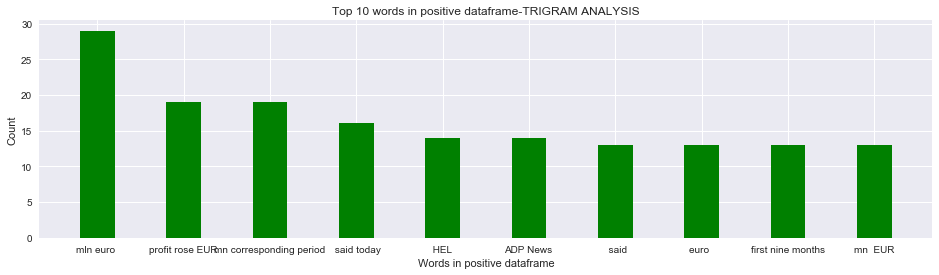

In [64]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

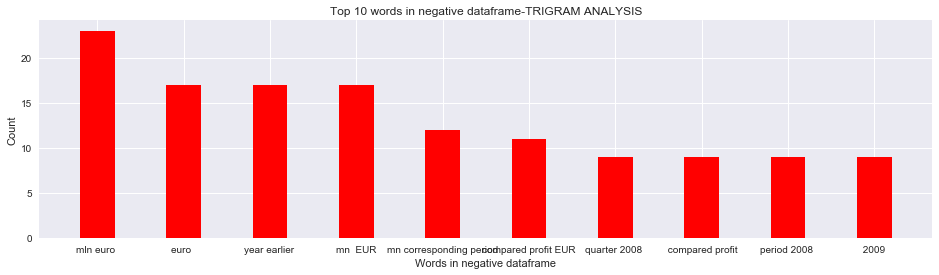

In [65]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

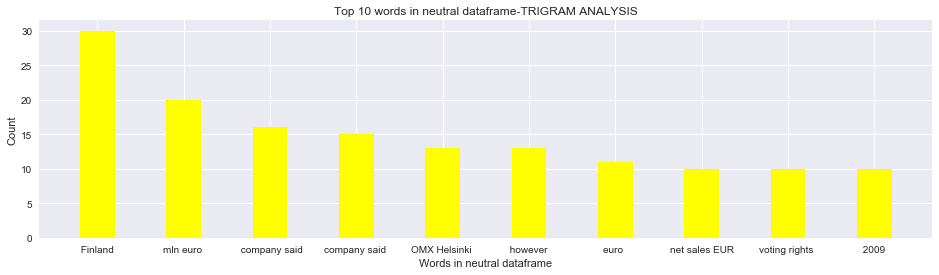

In [66]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

In [67]:
# 5.Results of the model
# From the above graphs, we can conclude that trigrams perform the best on our train data.This is because 
# it provides more useful words frequently such as 
# 1.profit rose EUR, year earlier for the positive data frame,corresponding period, period 2007, 
# 2.names of companies such as HEL for the negative data frame Finland company said and 
# 3.again names of companies such as HEL, OMX Helsinki and so on for neutral data frame.

In [ ]:
# 6.Conclusion
# Therefore,we have successfully understand what n-grams are and how we can generate any number of n-grams 
# for a given text dataset easily in Python and analyze our dataset thoroughly.